In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2017
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2017-03-01 to 2017-05-31
Columns: 388 entries, 10000009 to 22000047
dtypes: float64(388)
memory usage: 279.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-03-01  1.779391  0.983430  1.076774  1.266747  0.691306  0.680541   
2017-03-02  2.086974  0.987139  1.035765  1.289381  0.636370  0.626461   
2017-03-03  1.585109  0.792155  0.808270  1.114697  0.587023  0.577882   
2017-03-04  1.387018  0.795696  0.841622  1.087715  0.605839  0.596406   
2017-03-05  1.404494  1.002650  1.270679  1.173732  0.716090  0.704939   
...              ...       ...       ...       ...       ...       ...   
2017-05-27  0.717872  0.556078  0.330010  0.683583  0.352372  0.346885   
2017-05-28  0.714361  0.569653  0.331744  0.694759  0.359088  0.353496   
2017-05-29  0.716551  0.575957  0.306541  0.685941  0.356228  0.350681   
2017-05-30  0.728926  0.592170  0.340030  0.708009  0.366084  0.360383   
2017-05-31  0.730244  0.602841  0.291441  0.705475  0.363350  0.357692   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-03-01  2.508850  2.417876  

          2017-03-01  2017-03-02  2017-03-03  2017-03-04  2017-03-05  \
10000009   -0.088365    0.355746    0.140557    0.034515    0.007872   
10000010   -0.570420   -0.584908   -0.692225   -0.635008   -0.447154   
10000011   -0.513889   -0.543320   -0.675300   -0.583008   -0.143653   
10000014   -0.398836   -0.326410   -0.353482   -0.304369   -0.253430   
10000016   -0.747338   -0.884910   -0.907661   -0.849972   -0.771639   
...              ...         ...         ...         ...         ...   
9000015     0.140626    0.262157    0.164530   -0.031211   -0.053138   
9000172    -0.076362   -0.216265   -0.235741    0.020098    0.215086   
9000293     0.137179    0.229255    0.362882    0.610503    0.996684   
9000451    -0.468793   -0.411776   -0.405190   -0.370310   -0.344160   
22000047   -0.840555   -0.994375   -1.018318   -0.937623   -0.938957   

          2017-03-06  2017-03-07  2017-03-08  2017-03-09  2017-03-10  ...  \
10000009    0.224394    0.175320    0.044784    0.118355  

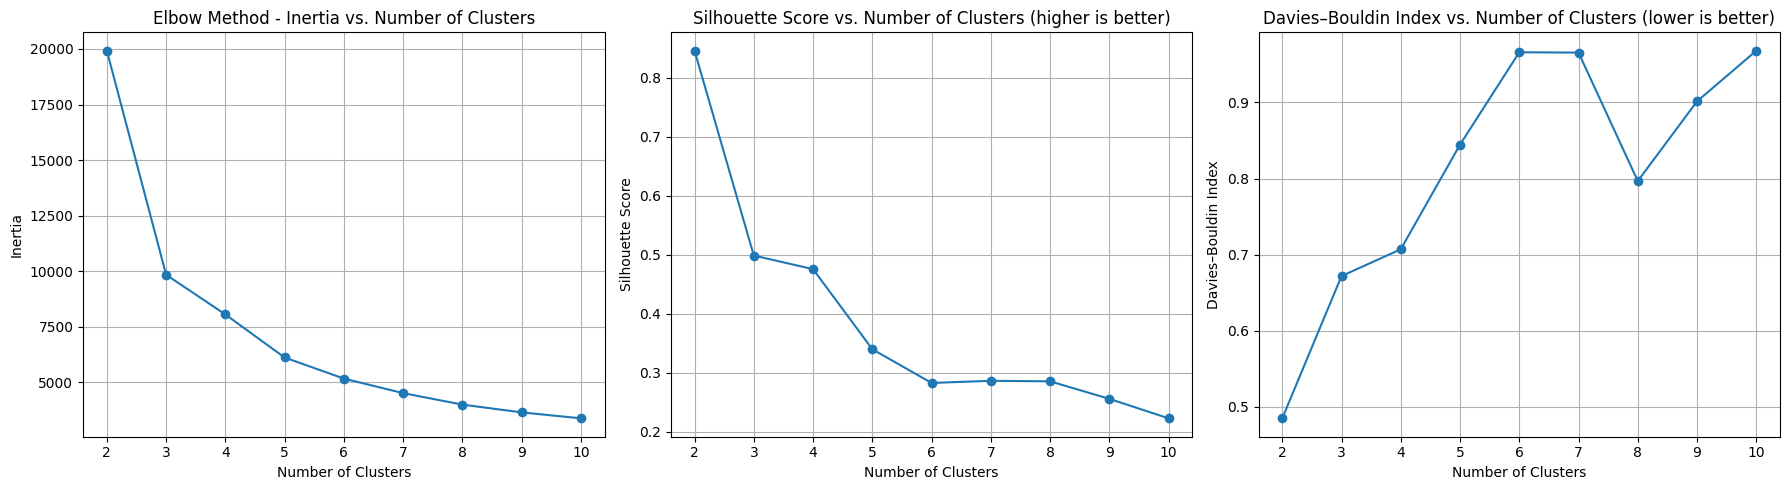

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-03-01  1.779391  0.983430  1.076774  1.266747  0.691306  0.680541   
2017-03-02  2.086974  0.987139  1.035765  1.289381  0.636370  0.626461   
2017-03-03  1.585109  0.792155  0.808270  1.114697  0.587023  0.577882   
2017-03-04  1.387018  0.795696  0.841622  1.087715  0.605839  0.596406   
2017-03-05  1.404494  1.002650  1.270679  1.173732  0.716090  0.704939   
...              ...       ...       ...       ...       ...       ...   
2017-05-27  0.717872  0.556078  0.330010  0.683583  0.352372  0.346885   
2017-05-28  0.714361  0.569653  0.331744  0.694759  0.359088  0.353496   
2017-05-29  0.716551  0.575957  0.306541  0.685941  0.356228  0.350681   
2017-05-30  0.728926  0.592170  0.340030  0.708009  0.366084  0.360383   
2017-05-31  0.730244  0.602841  0.291441  0.705475  0.363350  0.357692   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-03-01  2.508850  2.417876  

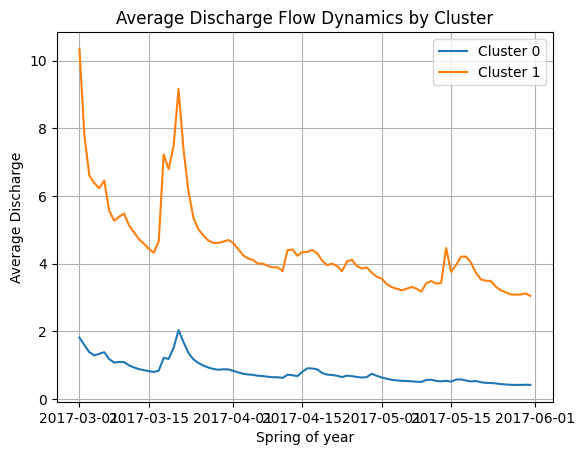

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2017-03-01  1.779391  0.983430  1.076774  1.266747  0.691306  0.680541   
2017-03-02  2.086974  0.987139  1.035765  1.289381  0.636370  0.626461   
2017-03-03  1.585109  0.792155  0.808270  1.114697  0.587023  0.577882   
2017-03-04  1.387018  0.795696  0.841622  1.087715  0.605839  0.596406   
2017-03-05  1.404494  1.002650  1.270679  1.173732  0.716090  0.704939   
...              ...       ...       ...       ...       ...       ...   
2017-05-27  0.717872  0.556078  0.330010  0.683583  0.352372  0.346885   
2017-05-28  0.714361  0.569653  0.331744  0.694759  0.359088  0.353496   
2017-05-29  0.716551  0.575957  0.306541  0.685941  0.356228  0.350681   
2017-05-30  0.728926  0.592170  0.340030  0.708009  0.366084  0.360383   
2017-05-31  0.730244  0.602841  0.291441  0.705475  0.363350  0.357692   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-03-01  2.508850  2.417876  1.362741  2.062351  ...  2.040364  1.212591   
2017-03-02  1.668511  1.608008  1.480622  1.919766  ...  1.904655  1.078254   
2017-03-03  1.319473  1.271627  1.536816  1.447677  ...  1.561890  0.906895   
2017-03-04  1.304001  1.256716  1.562467  1.275085  ...  1.556723  1.000536   
2017-03-05  1.939244  1.868925  1.598849  1.617338  ...  1.965840  1.499117   
...              ...       ...       ...       ...  ...       ...       ...   
2017-05-27  0.205897  0.198431  0.449576  0.486411  ...  0.253793  0.185973   
2017-05-28  0.204512  0.197097  0.434908  0.480837  ...  0.254459  0.180641   
2017-05-29  0.203666  0.196281  0.434137  0.481552  ...  0.253746  0.196785   
2017-05-30  0.206361  0.198878  0.429551  0.485389  ...  0.256396  0.178527   
2017-05-31  0.205557  0.198103  0.419320  0.483451  ...  0.255233  0.214229   

             7000333   8000001   9000001   9000015   9000172   9000293  \
2017-03-01  1.152552  1.731606  2.257967  2.157497  1.799211  2.151805   
2017-03-02  1.066232  1.690872  2.063324  1.977548  1.418166  1.939078   
2017-03-03  0.953770  1.482405  1.663603  1.607936  1.226807  1.796802   
2017-03-04  1.058800  1.596472  1.361647  1.328968  1.374284  1.895728   
2017-03-05  1.696644  1.994158  1.385080  1.350615  1.587489  2.277737   
...              ...       ...       ...       ...       ...       ...   
2017-05-27  0.343637  0.451515  0.917621  0.921723  0.470695  0.209413   
2017-05-28  0.342104  0.443282  0.888547  0.894939  0.461020  0.195837   
2017-05-29  0.346744  0.433657  0.840225  0.850384  0.450896  0.180935   
2017-05-30  0.368886  0.439221  0.827637  0.838832  0.462498  0.178402   
2017-05-31  0.352822  0.439235  0.782983  0.797677  0.460357  0.167312   

             9000451  22000047  
2017-03-01  1.151236  0.537388  
2017-03-02  1.189569  0.508382  
2017-03-03  1.065462  0.481658  
2017-03-04  1.029476  0.528427  
2017-03-05  1.093606  0.568327  
...              ...       ...  
2017-05-27  0.234027  0.362533  
2017-05-28  0.227935  0.359771  
2017-05-29  0.222821  0.361812  
2017-05-30  0.217584  0.361197  
2017-05-31  0.213507  0.359652  

[92 rows x 388 columns]

<Axes: >

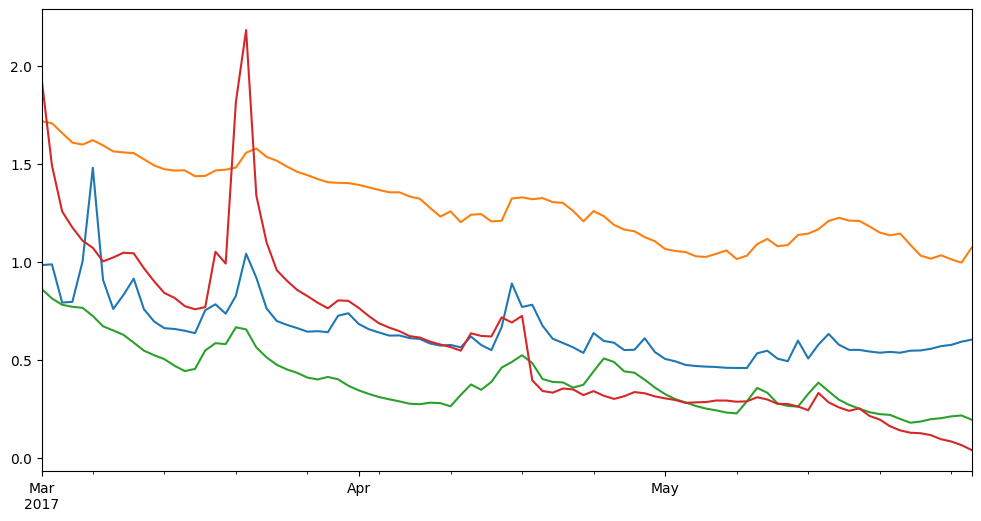

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

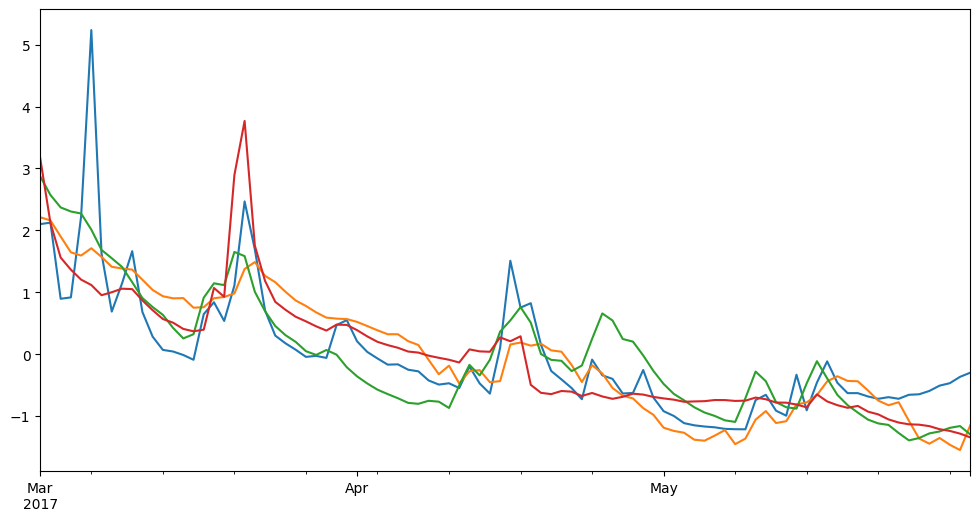

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

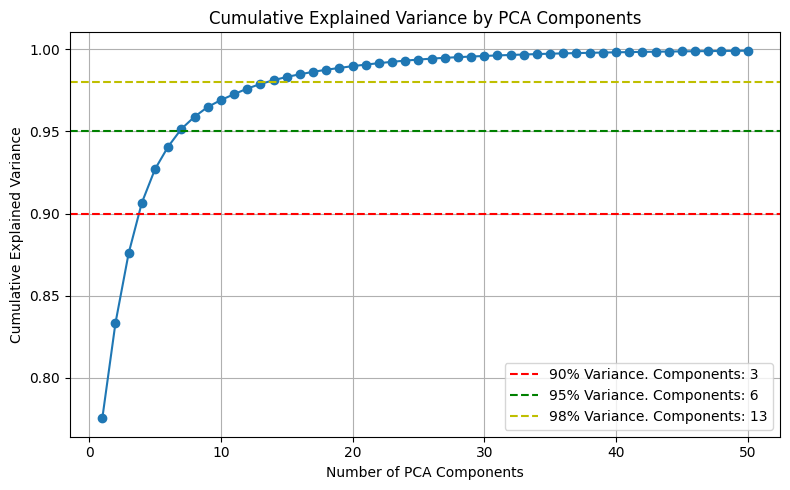

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 5.24220520e+01, -9.81629140e+00, -2.30318578e+00, ...,
         1.07334061e+00, -8.60740124e-01,  3.05759445e-01],
       [ 4.14951904e+01, -8.78394768e+00, -2.76029503e+00, ...,
        -1.61717396e+00,  1.04067523e+00, -5.28509228e-01],
       [ 3.09279916e+01, -6.06773129e+00, -3.62045669e+00, ...,
        -3.84808381e-01,  5.16047912e-01, -1.85205856e-02],
       ...,
       [-2.15735023e+01,  2.12532871e+00, -4.01676726e+00, ...,
         2.94079123e-01,  9.03322460e-02,  3.79763093e-01],
       [-2.11827079e+01,  2.06000846e+00, -3.68574061e+00, ...,
         4.43222974e-01, -5.66805110e-02,  3.05811057e-01],
       [-2.15051206e+01,  1.91492364e+00, -3.73123420e+00, ...,
         4.15895137e-01, -3.13122866e-01,  4.86771171e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


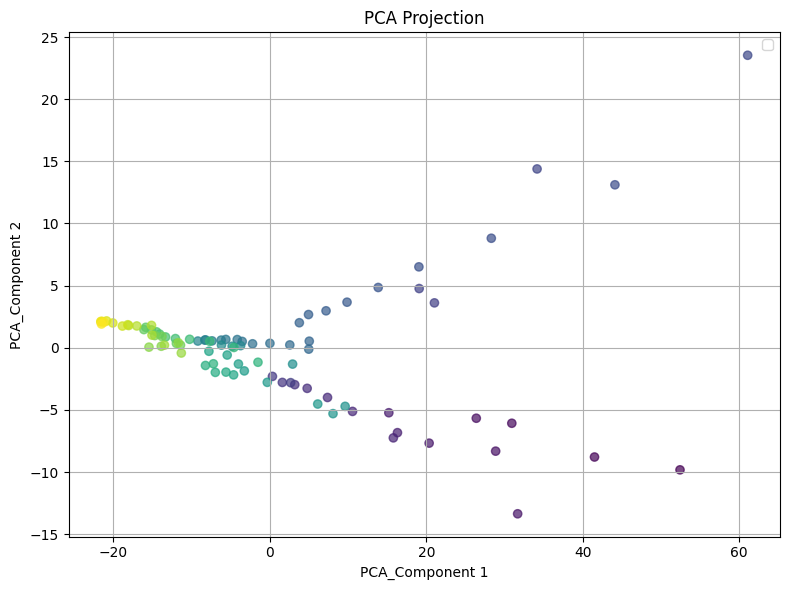

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


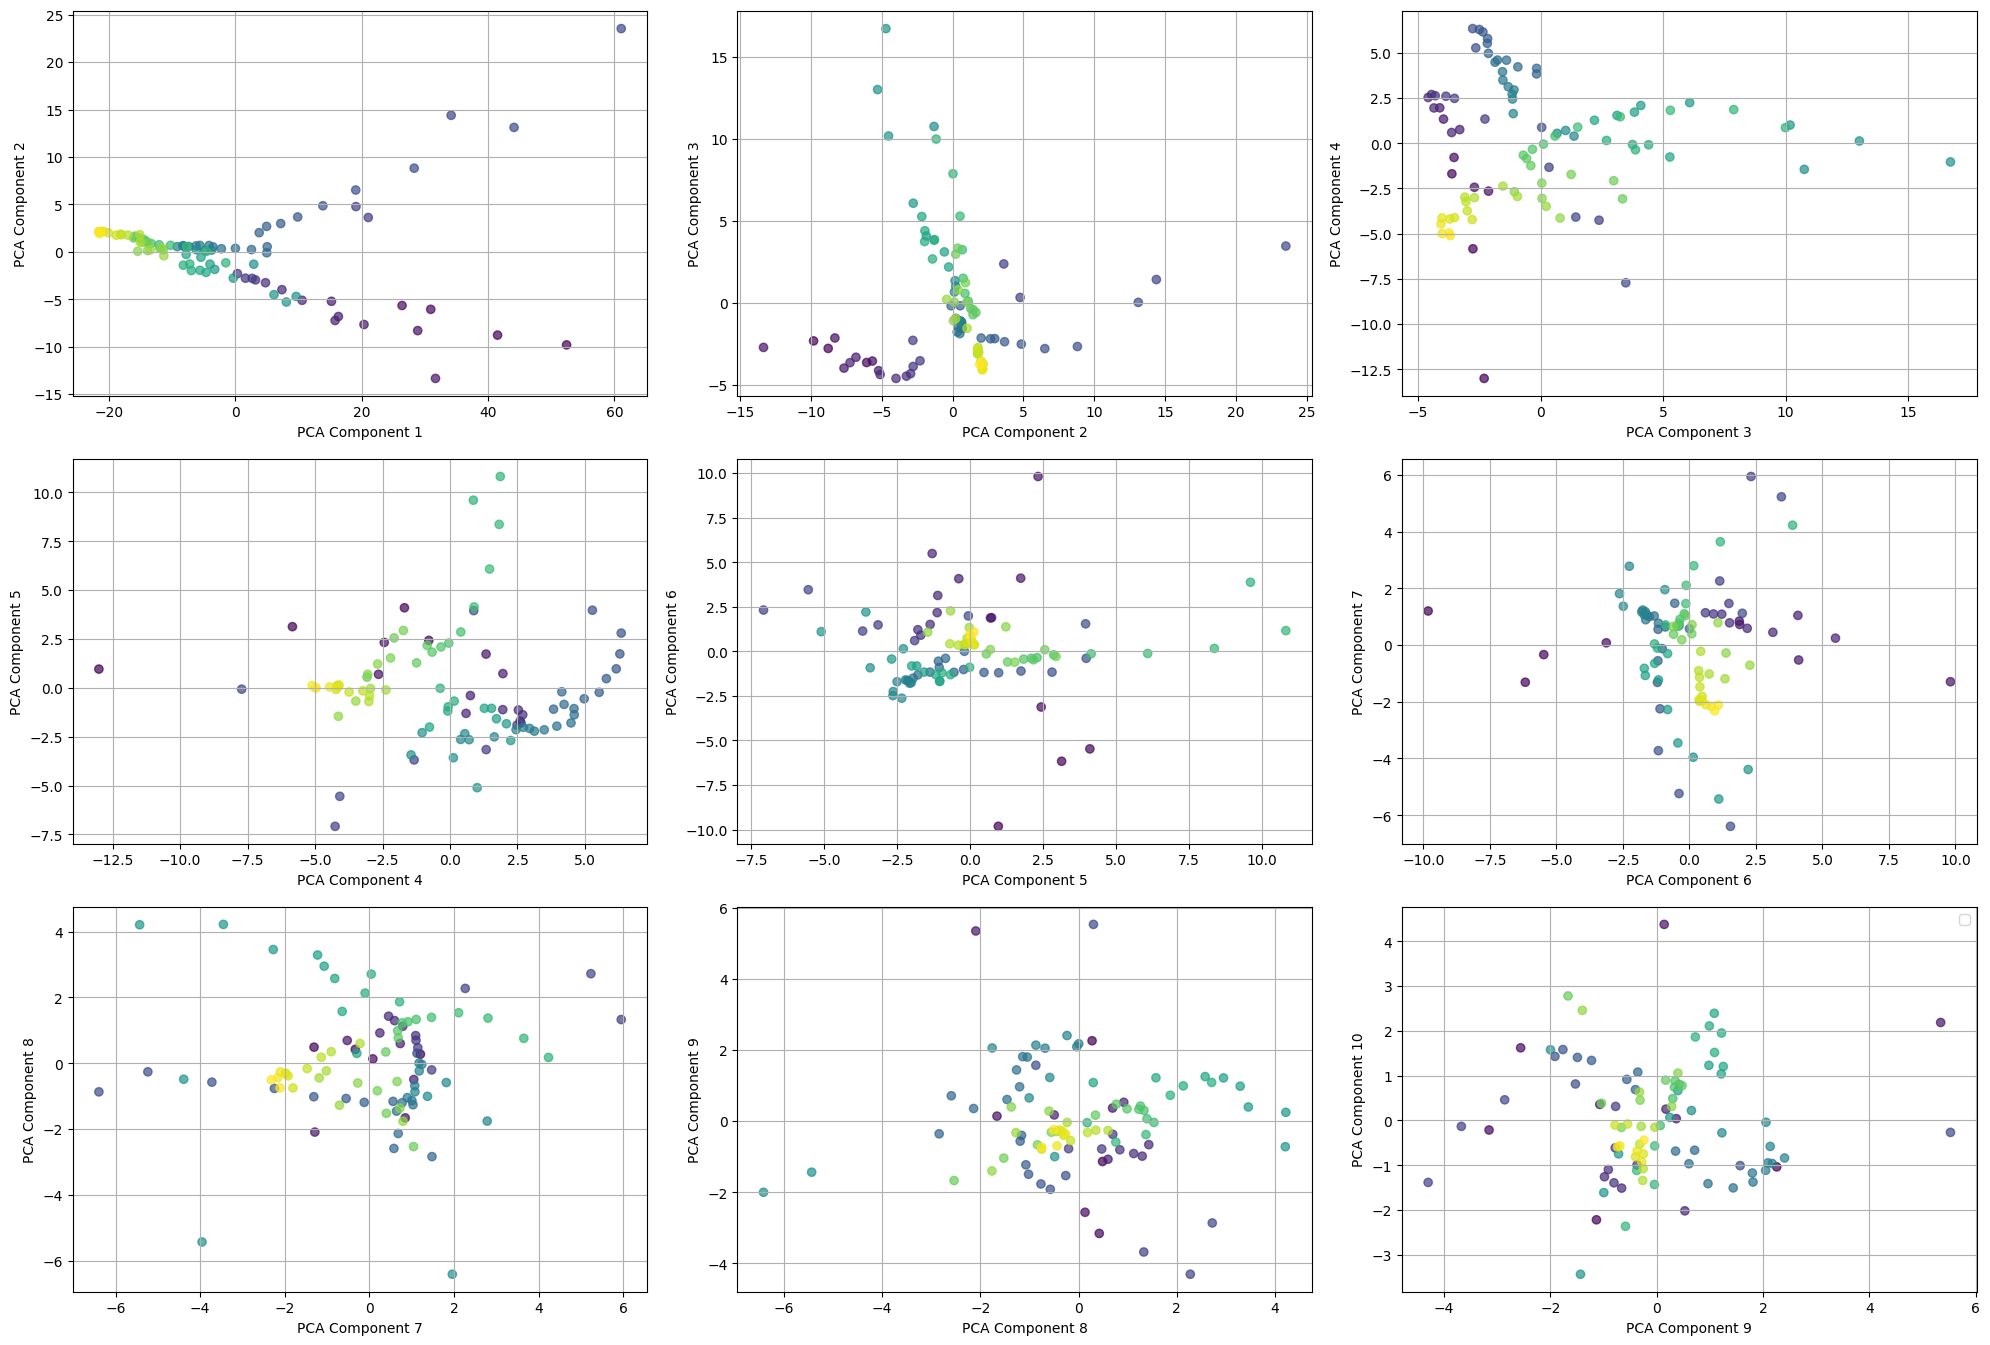

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.356
KMeans Davies-Bouldin Index is 0.946


<Axes: xlabel='k'>

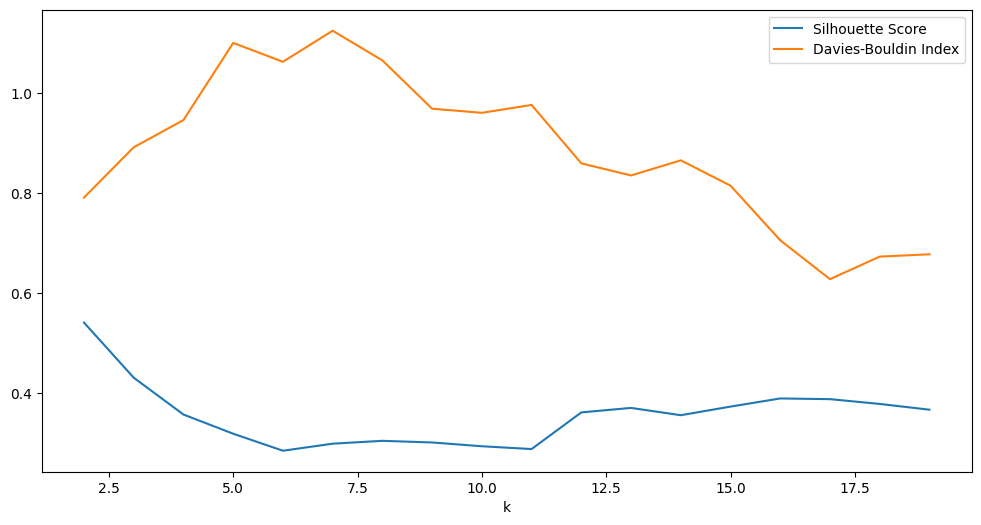

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         1     89               NaN   
2    1.01            3         3     81         -0.231565   
3    1.27            3         3     79         -0.191773   
4    1.52            3         3     76         -0.138614   
5    1.78            3         5     68         -0.118715   
6    2.03            3         4     66         -0.040189   
7    2.29            3         6     59         -0.076072   
8    2.54            3         6     52         -0.005585   
9    2.80            3         7     45          0.047951   
10   3.05            3         7     40          0.047509   
11   3.31            3         8     35          0.094010   
12   3.56            3         7     32          0.109170   
13   3.82            3         7     27          0.163850   
14   4.07            3         6     27          0.114873   
15   4.33            3         5     26          0.170345   
16   4.58            3         6     21          0.146032   
17   4.84            3         6     21          0.146032   
18   5.09            3         5     21          0.172560   
19   5.35            3         5     20          0.183949   
20   5.60            3         5     19          0.182705   
21   5.86            3         5     18          0.194186   
22   6.11            3         3     17          0.256620   
23   6.37            3         2     17          0.316148   
24   6.62            3         2     17          0.316148   
25   6.88            3         2     17          0.316148   
26   7.13            3         2     17          0.316148   
27   7.39            3         2     17          0.316148   
28   7.64            3         2     17          0.316148   
29   7.90            3         1     17               NaN   
30   8.15            3         1     17               NaN   
31   8.41            3         1     17               NaN   
32   8.66            3         1     17               NaN   
33   8.92            3         2     14          0.402517   
34   9.17            3         3     11          0.269812   
35   9.43            3         3     11          0.269812   
36   9.68            3         2     10          0.421333   
37   9.94            3         2     10          0.421333   
38  10.19            3         2      9          0.412256   
39  10.45            3         2      9          0.412256   
40  10.70            3         2      9          0.412256   
41  10.96            3         1      9               NaN   
42  11.21            3         1      9               NaN   
43  11.47            3         1      9               NaN   
44  11.72            3         1      9               NaN   
45  11.98            3         1      9               NaN   
46  12.23            3         1      9               NaN   
47  12.49            3         1      9               NaN   
48  12.74            3         1      7               NaN   
49  13.00            3         1      7               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.185705  
3               1.138941  
4               1.098330  
5               1.163299  
6               1.070325  
7               1.488915  
8               1.478682  
9               1.596544  
10              1.716396  
11              1.378080  
12              1.158421  
13              1.125350  
14              1.190340  
15              1.125511  
16              1.333655  
17              1.333655  
18              1.391252  
19              1.315546  
20              1.271452  
21              1.298091  
22              1.236284  
23              1.092113  
24              1.092113  
25              1.092113  
26              1.092113  
27              1.092113  
28              1.092113  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

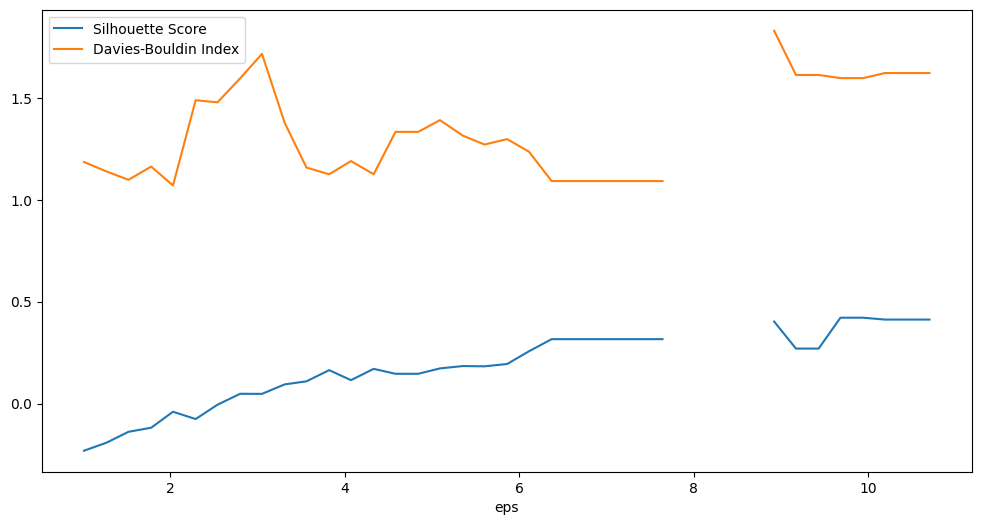

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

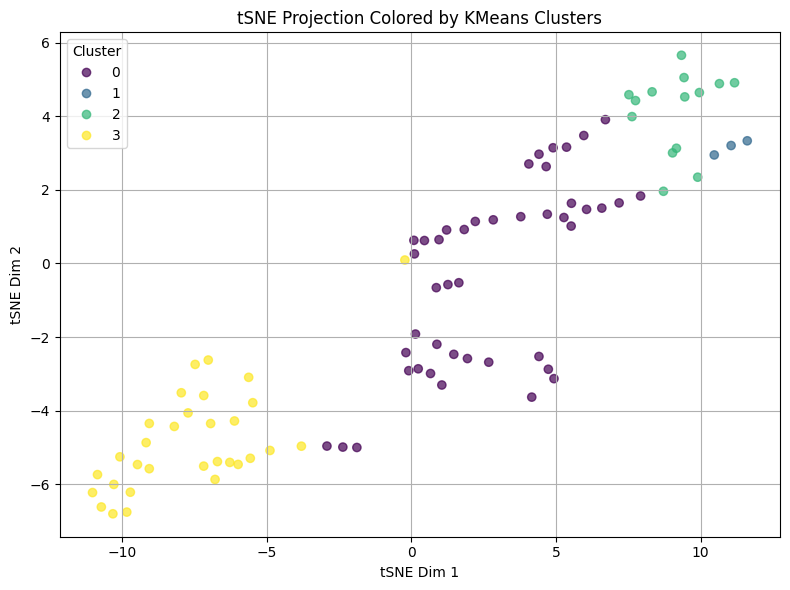

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         3    382          0.995154   
1    0.05            2         3    382          0.995154   
2    0.06            2         3    382          0.995154   
3    0.06            2         3    382          0.995154   
4    0.07            2         3    382          0.995154   
..    ...          ...       ...    ...               ...   
195  0.98            2        41    167          0.322415   
196  0.99            2        41    166          0.320693   
197  0.99            2        42    162          0.311759   
198  1.00            2        43    160          0.314943   
199  1.00            2        44    156          0.311331   

     Davies-Bouldin Index  
0                0.004940  
1                0.004940  
2                0.004940  
3                0.004940  
4                0.004940  
..                    ...  
195              0.667124  
196              0.672774  
197              0.686408  
198              0.676647  
199              0.683330  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

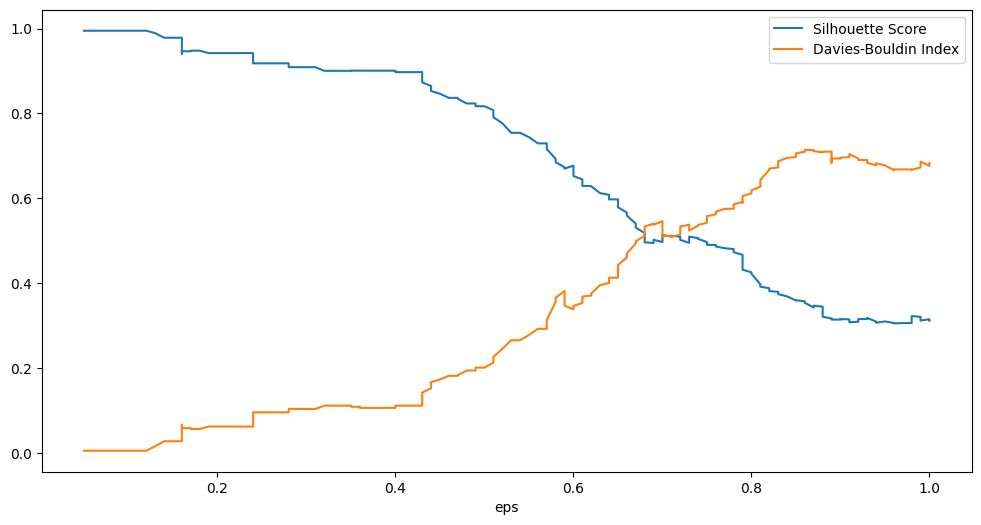

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2017
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2017-06-01 to 2017-08-31
Columns: 382 entries, 10000009 to 22000047
dtypes: float64(382)
memory usage: 275.3 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-06-01  0.702830  0.574649  0.280847  0.690466  0.353915  0.348404   
2017-06-02  0.689986  0.562133  0.271558  0.682748  0.350510  0.345052   
2017-06-03  0.689490  0.585449  0.269979  0.687096  0.352633  0.347141   
2017-06-04  0.695552  0.592003  0.272544  0.698638  0.358124  0.352548   
2017-06-05  0.689333  0.594992  0.277780  0.714920  0.370747  0.364974   
...              ...       ...       ...       ...       ...       ...   
2017-08-27  0.942508  0.609703  0.388101  0.820551  0.546455  0.537945   
2017-08-28  0.997235  0.596967  0.375669  0.804114  0.499972  0.492186   
2017-08-29  0.872931  0.573862  0.350409  0.779350  0.476739  0.469316   
2017-08-30  0.829035  0.550936  0.333001  0.789880  0.508970  0.501044   
2017-08-31  0.826942  0.533787  0.349539  0.823236  0.564387  0.555598   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-06-01  0.188794  0.181948  

          2017-06-01  2017-06-02  2017-06-03  2017-06-04  2017-06-05  \
10000009    0.562465    0.571207    0.566920    0.535409    0.538046   
10000010    0.288643    0.293783    0.343065    0.310781    0.329079   
10000011   -0.338979   -0.336728   -0.335700   -0.382222   -0.373543   
10000014    0.536053    0.555501    0.561769    0.542102    0.594720   
10000016   -0.182889   -0.165412   -0.157863   -0.196572   -0.167622   
...              ...         ...         ...         ...         ...   
9000015     0.745037    0.714935    0.673964    0.627777    0.713554   
9000172    -0.025800   -0.032945   -0.012228   -0.054380   -0.061131   
9000293    -0.621004   -0.625880   -0.625115   -0.688048   -0.713172   
9000451    -0.510519   -0.503071   -0.506174   -0.573343   -0.595043   
22000047   -0.177875   -0.164132   -0.162273   -0.210552   -0.217394   

          2017-06-06  2017-06-07  2017-06-08  2017-06-09  2017-06-10  ...  \
10000009    0.522569    0.396832    0.358374    0.264796  

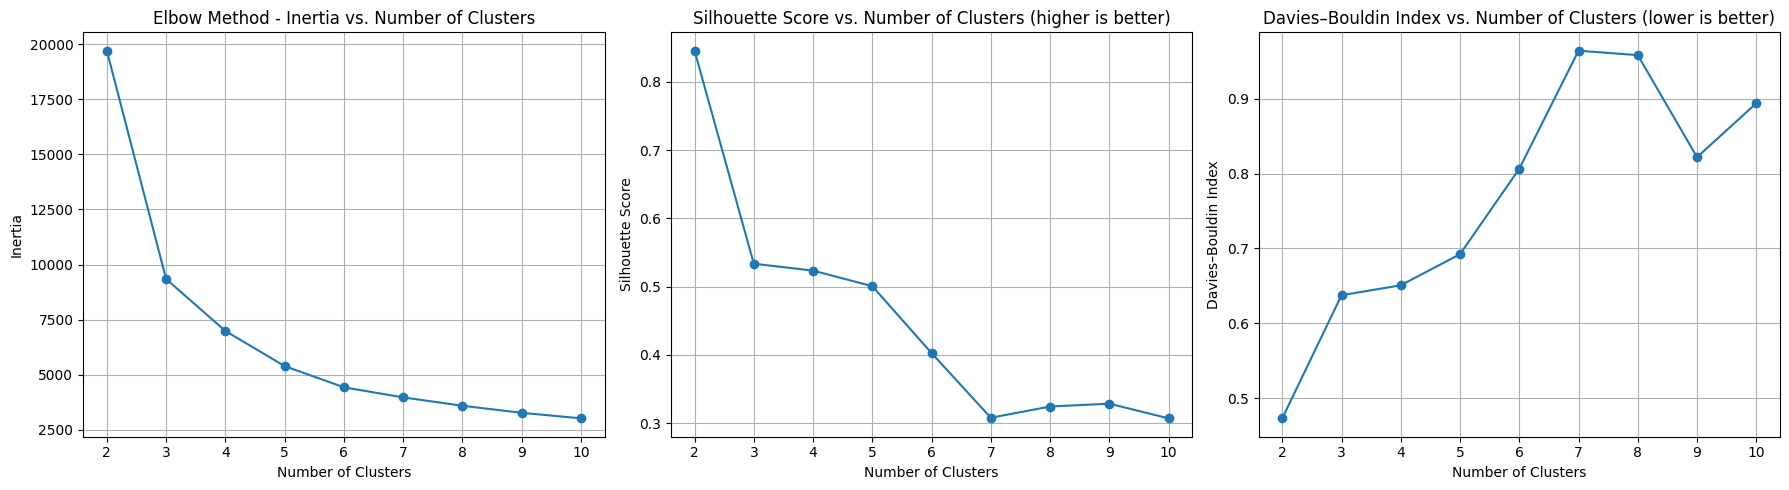

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        1
10000014        0
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-06-01  0.702830  0.574649  0.280847  0.690466  0.353915  0.348404   
2017-06-02  0.689986  0.562133  0.271558  0.682748  0.350510  0.345052   
2017-06-03  0.689490  0.585449  0.269979  0.687096  0.352633  0.347141   
2017-06-04  0.695552  0.592003  0.272544  0.698638  0.358124  0.352548   
2017-06-05  0.689333  0.594992  0.277780  0.714920  0.370747  0.364974   
...              ...       ...       ...       ...       ...       ...   
2017-08-27  0.942508  0.609703  0.388101  0.820551  0.546455  0.537945   
2017-08-28  0.997235  0.596967  0.375669  0.804114  0.499972  0.492186   
2017-08-29  0.872931  0.573862  0.350409  0.779350  0.476739  0.469316   
2017-08-30  0.829035  0.550936  0.333001  0.789880  0.508970  0.501044   
2017-08-31  0.826942  0.533787  0.349539  0.823236  0.564387  0.555598   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-06-01  0.188794  0.181948  

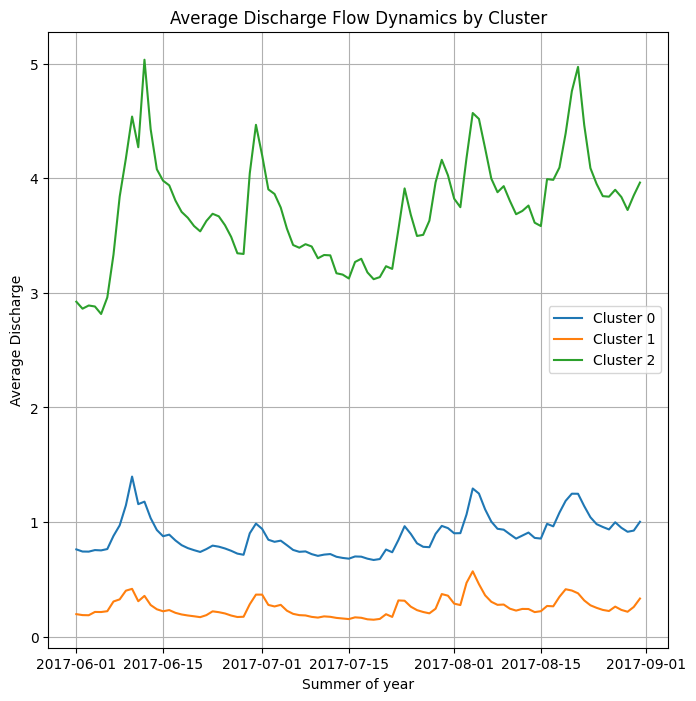

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2017-06-01  0.702830  0.574649  0.280847  0.690466  0.353915  0.348404   
2017-06-02  0.689986  0.562133  0.271558  0.682748  0.350510  0.345052   
2017-06-03  0.689490  0.585449  0.269979  0.687096  0.352633  0.347141   
2017-06-04  0.695552  0.592003  0.272544  0.698638  0.358124  0.352548   
2017-06-05  0.689333  0.594992  0.277780  0.714920  0.370747  0.364974   
...              ...       ...       ...       ...       ...       ...   
2017-08-27  0.942508  0.609703  0.388101  0.820551  0.546455  0.537945   
2017-08-28  0.997235  0.596967  0.375669  0.804114  0.499972  0.492186   
2017-08-29  0.872931  0.573862  0.350409  0.779350  0.476739  0.469316   
2017-08-30  0.829035  0.550936  0.333001  0.789880  0.508970  0.501044   
2017-08-31  0.826942  0.533787  0.349539  0.823236  0.564387  0.555598   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-06-01  0.188794  0.181948  0.418714  0.469064  ...  0.239324  0.182203   
2017-06-02  0.181995  0.175396  0.412354  0.462147  ...  0.228074  0.149966   
2017-06-03  0.179568  0.173057  0.409263  0.453614  ...  0.228301  0.143153   
2017-06-04  0.186946  0.180167  0.402253  0.451292  ...  0.249659  0.182917   
2017-06-05  0.179144  0.172648  0.391233  0.446026  ...  0.250267  0.174173   
...              ...       ...       ...       ...  ...       ...       ...   
2017-08-27  0.928585  0.894913  0.411488  0.524052  ...  0.898948  0.770427   
2017-08-28  0.890460  0.858171  0.412941  0.502649  ...  0.901050  0.704440   
2017-08-29  0.755226  0.727841  0.413953  0.473803  ...  0.827377  0.678943   
2017-08-30  0.694160  0.668989  0.420250  0.465204  ...  0.763949  0.727133   
2017-08-31  0.653148  0.629464  0.423461  0.470632  ...  0.710760  0.715517   

             7000333   8000001   9000001   9000015   9000172   9000293  \
2017-06-01  0.321849  0.417023  0.772743  0.788295  0.427452  0.148825   
2017-06-02  0.314602  0.403201  0.737918  0.756224  0.411558  0.138300   
2017-06-03  0.313470  0.402092  0.719438  0.739241  0.420319  0.135468   
2017-06-04  0.345633  0.423898  0.718161  0.738132  0.423672  0.131565   
2017-06-05  0.333475  0.424937  0.751065  0.768569  0.418824  0.124449   
...              ...       ...       ...       ...       ...       ...   
2017-08-27  0.730604  1.095285  1.021736  1.021005  0.878380  1.369655   
2017-08-28  0.754509  1.062621  1.066133  1.061990  0.750968  0.841794   
2017-08-29  0.683743  1.037970  1.054750  1.051335  0.699033  0.700857   
2017-08-30  0.639614  0.993646  1.066470  1.062052  0.676907  0.637770   
2017-08-31  0.652966  0.990856  1.065408  1.060933  0.661570  0.556435   

             9000451  22000047  
2017-06-01  0.200545  0.356263  
2017-06-02  0.194897  0.351100  
2017-06-03  0.190748  0.350583  
2017-06-04  0.184441  0.351680  
2017-06-05  0.177780  0.348276  
...              ...       ...  
2017-08-27  0.285154  0.368122  
2017-08-28  0.266946  0.357145  
2017-08-29  0.266728  0.355887  
2017-08-30  0.258728  0.357272  
2017-08-31  0.252112  0.359490  

[92 rows x 382 columns]

<Axes: >

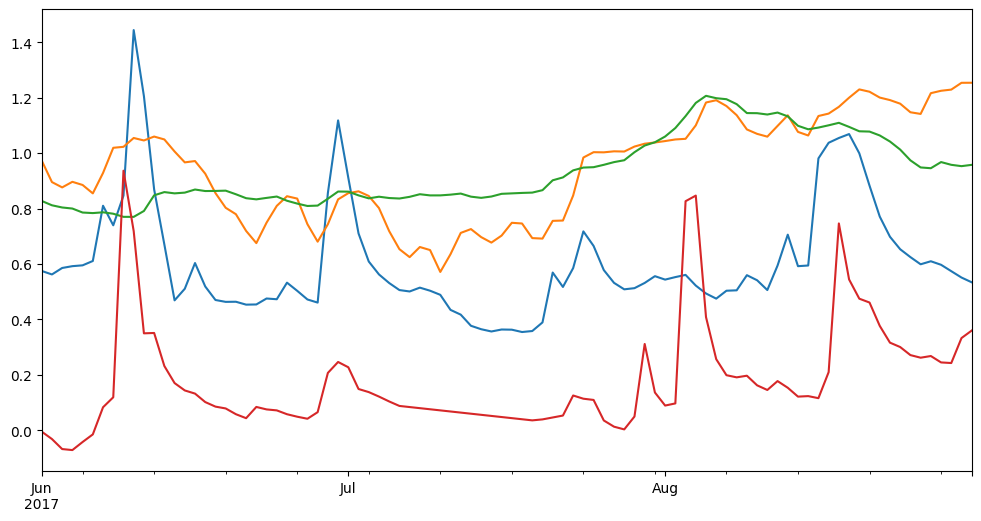

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

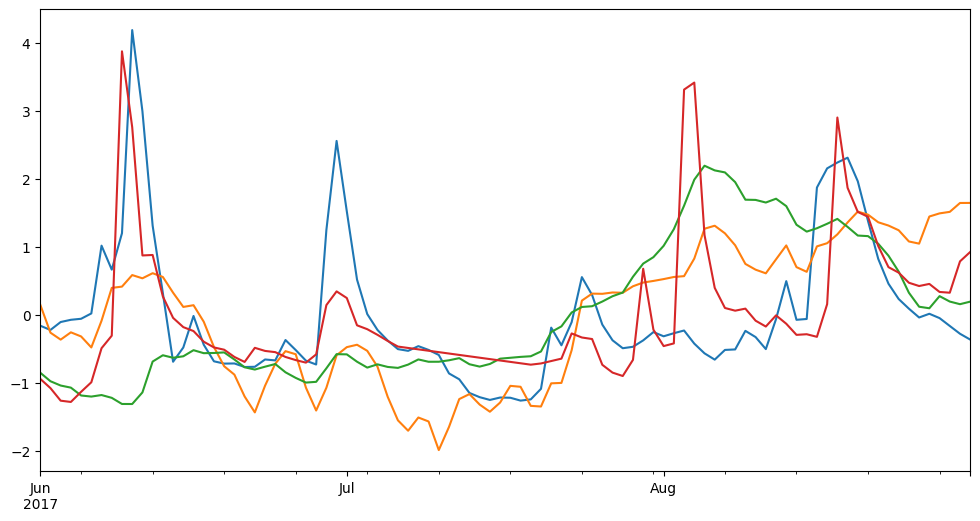

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

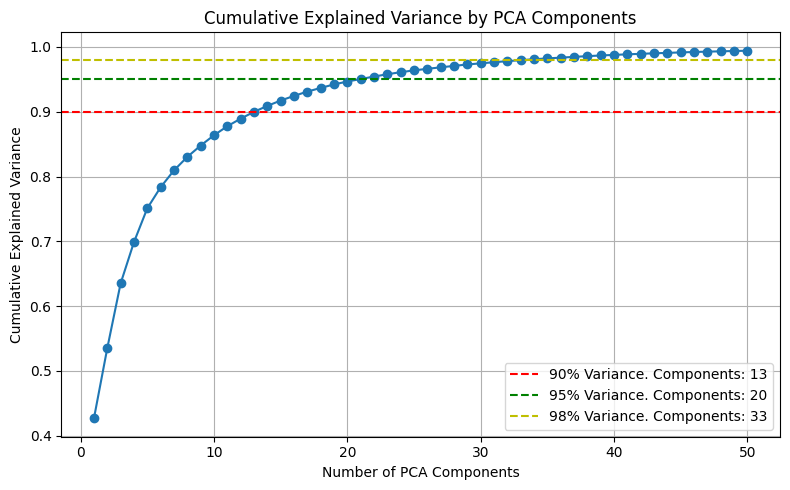

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-7.41467676, -3.80850253, -3.02169737, ..., -0.12746416,
         1.15633598,  0.34177301],
       [-9.19433277, -3.41526357, -3.16718875, ...,  0.04921083,
         0.75296229, -0.93893884],
       [-9.51597124, -3.54881541, -3.19662935, ...,  0.22993165,
         0.85663529, -0.80705803],
       ...,
       [-2.12313532,  7.85924437, -8.15892787, ..., -0.03599122,
         0.47390905, -0.74109357],
       [ 1.72644233,  5.21666699, -6.44745998, ...,  2.08270049,
        -0.95114698, -0.53538616],
       [11.21321995,  0.81767791, -5.10216341, ...,  4.70447519,
         0.4612321 ,  2.50402982]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


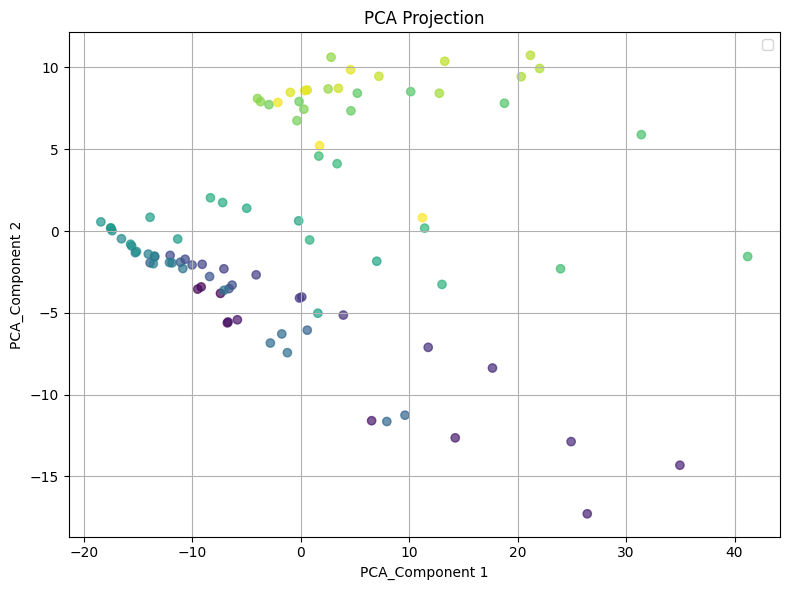

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


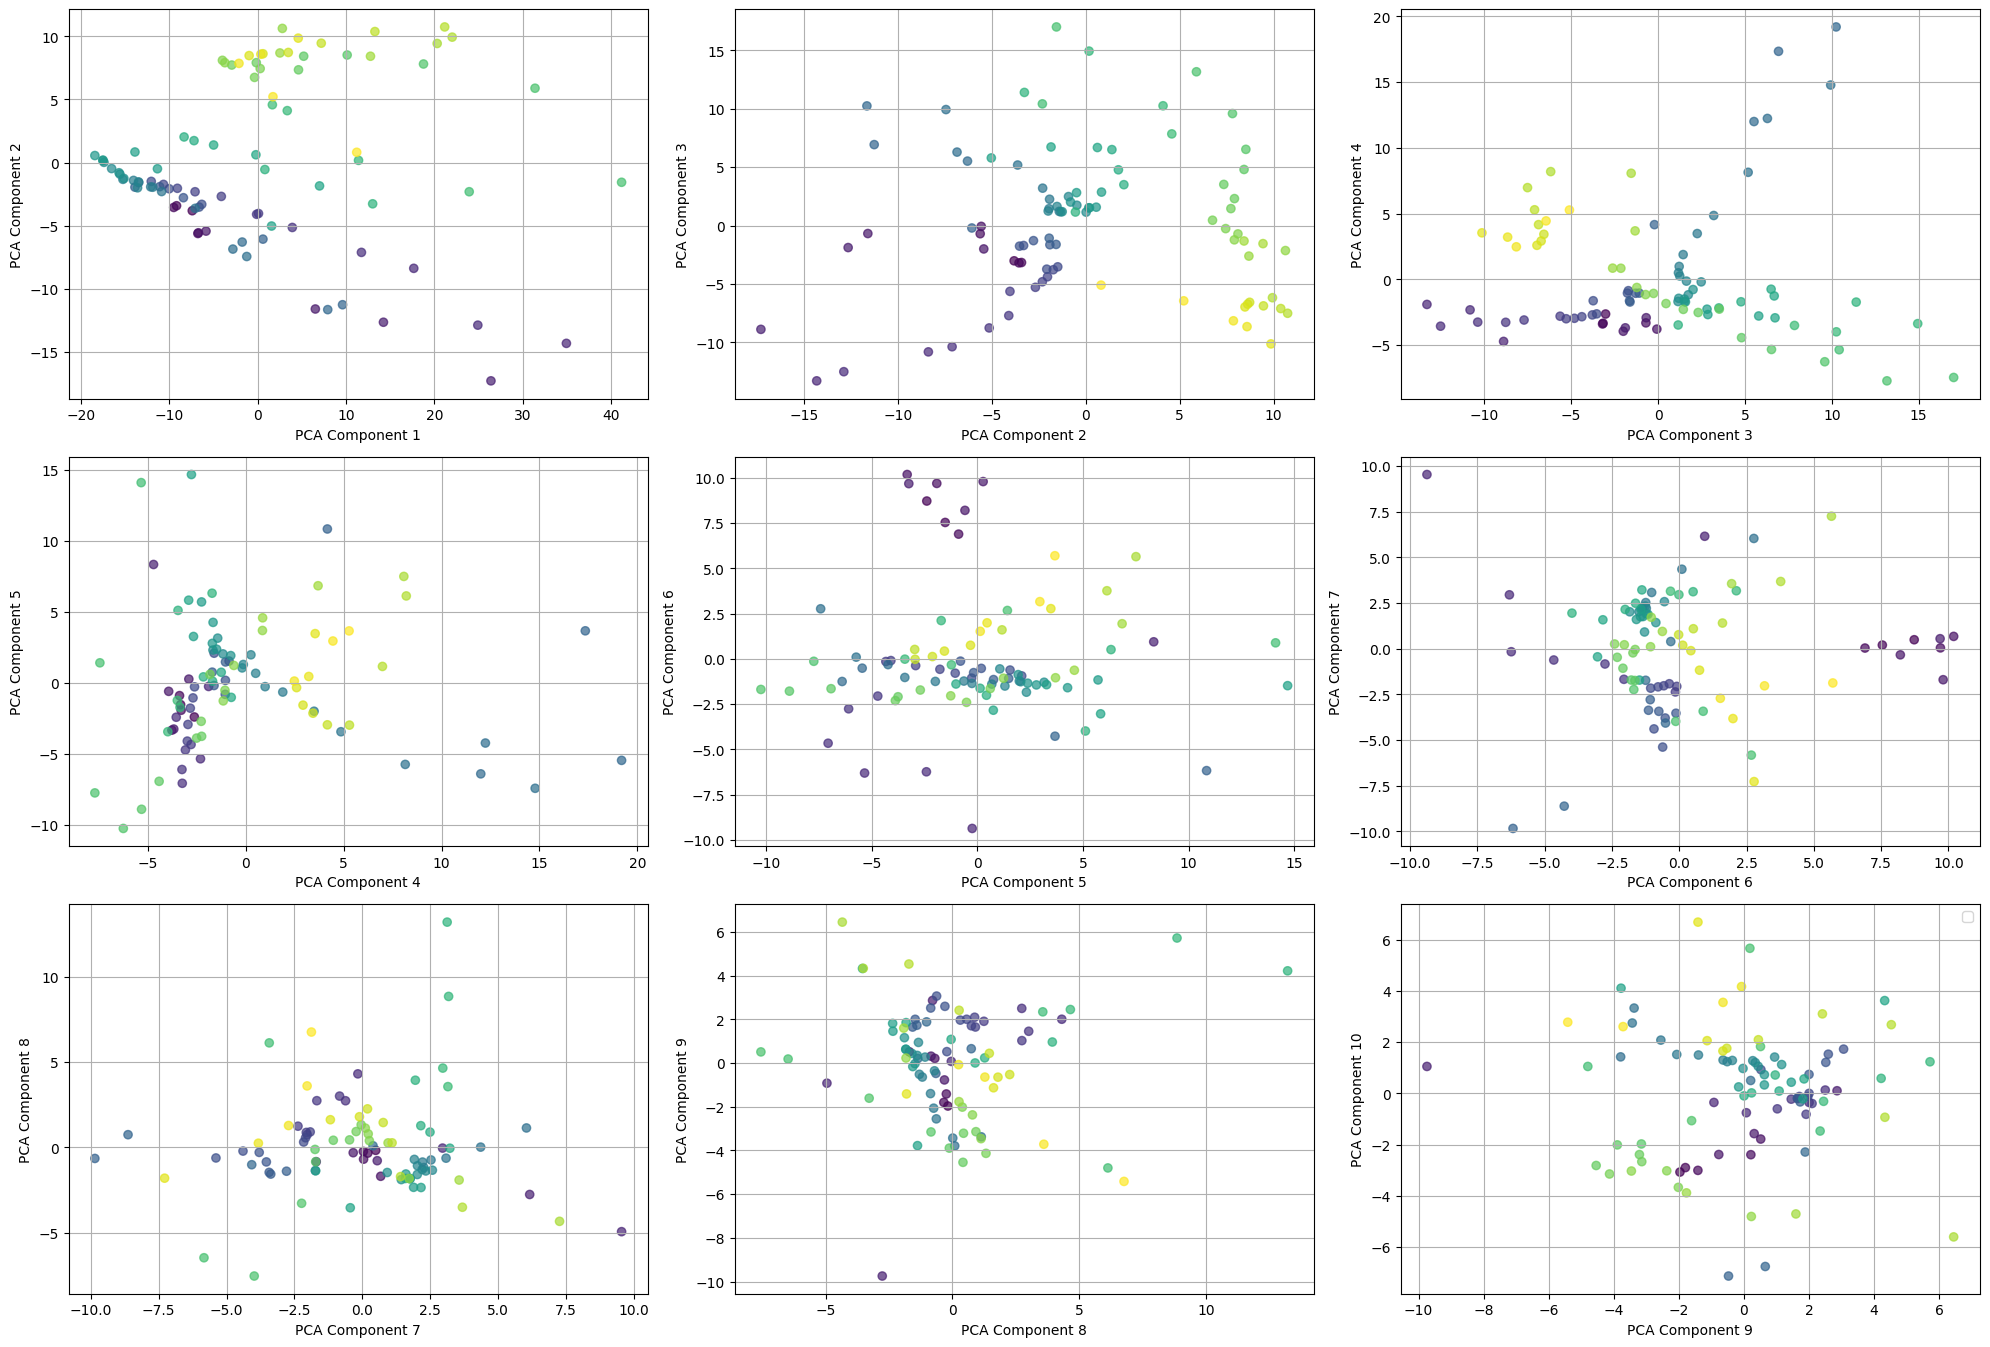

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.251
KMeans Davies-Bouldin Index is 1.554


<Axes: xlabel='k'>

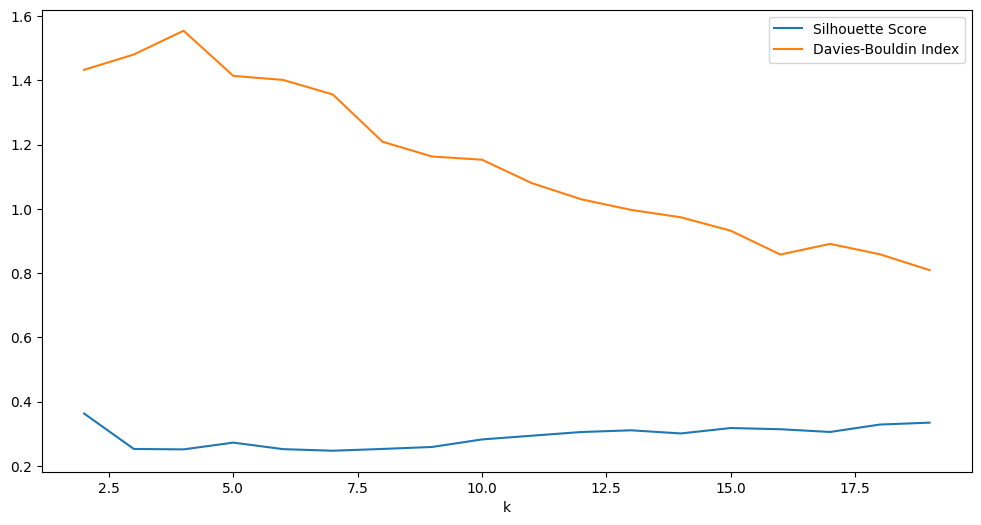

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         1     89               NaN   
5    1.78            3         1     88               NaN   
6    2.03            3         1     88               NaN   
7    2.29            3         2     82         -0.126934   
8    2.54            3         3     77         -0.109915   
9    2.80            3         3     76         -0.101027   
10   3.05            3         2     73         -0.036672   
11   3.31            3         5     64         -0.063112   
12   3.56            3         5     61         -0.037074   
13   3.82            3         5     61         -0.037074   
14   4.07            3         7     54         -0.001384   
15   4.33            3         8     50          0.037890   
16   4.58            3         8     50          0.037890   
17   4.84            3         7     43          0.124414   
18   5.09            3         7     42          0.122553   
19   5.35            3         7     42          0.122553   
20   5.60            3         7     40          0.134871   
21   5.86            3         7     38          0.153299   
22   6.11            3         7     37          0.155627   
23   6.37            3         6     36          0.175277   
24   6.62            3         6     36          0.175277   
25   6.88            3         6     34          0.188820   
26   7.13            3         5     34          0.130572   
27   7.39            3         5     33          0.133481   
28   7.64            3         5     33          0.133481   
29   7.90            3         5     33          0.133481   
30   8.15            3         5     33          0.133481   
31   8.41            3         5     33          0.133481   
32   8.66            3         5     31          0.140344   
33   8.92            3         4     30          0.154234   
34   9.17            3         4     29          0.143047   
35   9.43            3         4     28          0.141078   
36   9.68            3         4     28          0.141078   
37   9.94            3         4     28          0.141078   
38  10.19            3         3     26          0.139454   
39  10.45            3         3     26          0.139454   
40  10.70            3         3     25          0.138475   
41  10.96            3         2     23          0.218687   
42  11.21            3         2     22          0.227653   
43  11.47            3         2     21          0.228150   
44  11.72            3         1     21               NaN   
45  11.98            3         1     21               NaN   
46  12.23            3         1     21               NaN   
47  12.49            3         1     20               NaN   
48  12.74            3         1     17               NaN   
49  13.00            3         1     17               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7               1.230444  
8               1.216013  
9               1.204843  
10              1.272876  
11              1.301064  
12              1.340751  
13              1.340751  
14              1.370458  
15              1.312406  
16              1.312406  
17              1.351708  
18              1.359713  
19              1.359713  
20              1.404957  
21              1.338616  
22              1.368051  
23              1.389309  
24              1.389309  
25              1.381159  
26              1.434400  
27              1.458192  
28              1.458192  
29              1.458192  
30              1.458192  
31              1.458192  
32 

<Axes: xlabel='eps'>

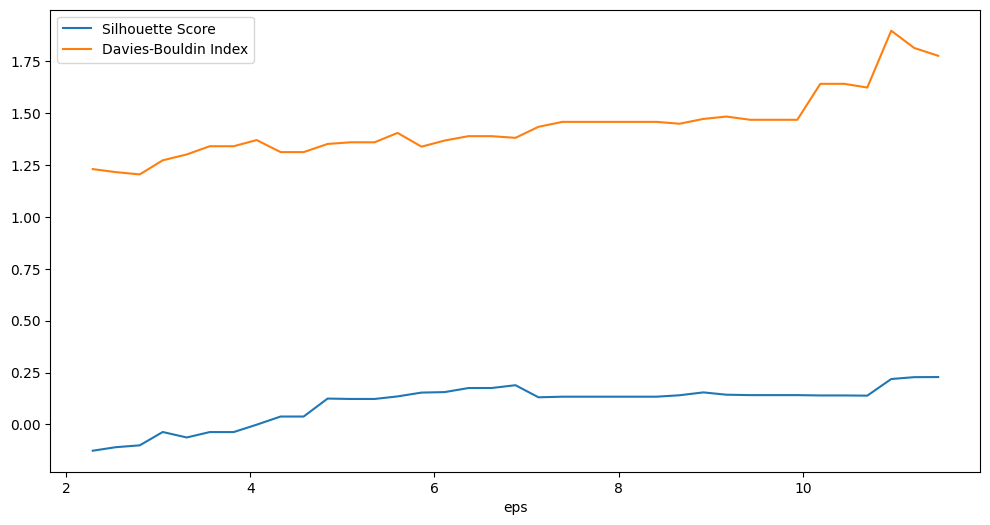

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

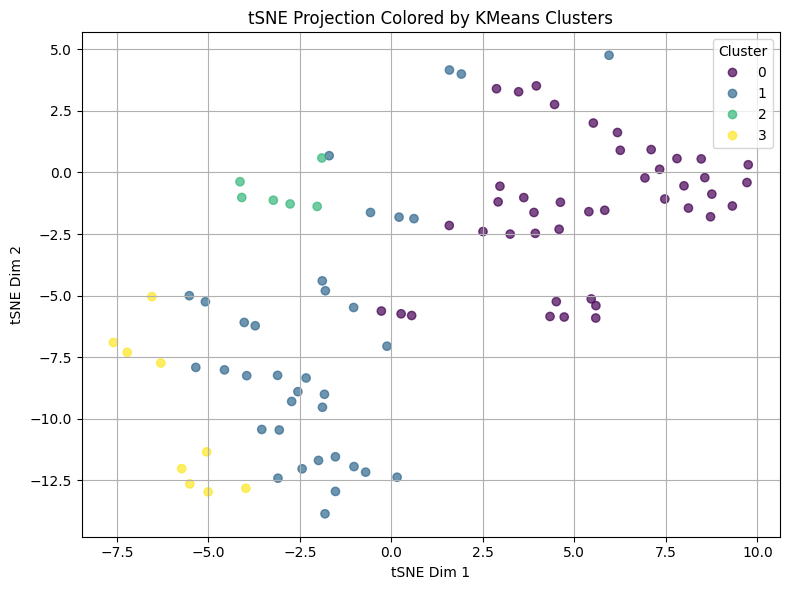

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         3    376          0.997332   
1    0.05            2         3    376          0.997332   
2    0.06            2         3    376          0.997332   
3    0.06            2         4    374          0.993618   
4    0.07            2         5    372          0.991457   
..    ...          ...       ...    ...               ...   
195  0.98            2        20    107          0.009110   
196  0.99            2        19    107         -0.008408   
197  0.99            2        19    107         -0.008408   
198  1.00            2        19    107         -0.008408   
199  1.00            2        19    107         -0.008408   

     Davies-Bouldin Index  
0                0.003431  
1                0.003431  
2                0.003431  
3                0.006446  
4                0.008962  
..                    ...  
195              0.700440  
196              0.698281  
197              0.698281  
198              0.698281  
199              0.698281  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

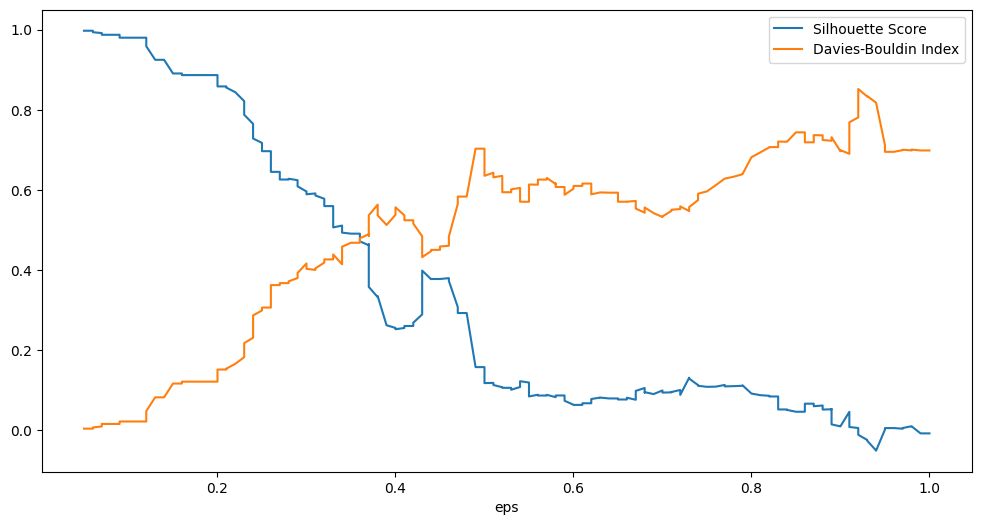

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2017
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2017-09-01 to 2017-11-30
Columns: 388 entries, 10000009 to 22000047
dtypes: float64(388)
memory usage: 276.6 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-09-01  0.816956  0.544572  0.333039  0.823026  0.539977  0.531569   
2017-09-02  0.786442  0.490469  0.319710  0.777852  0.527467  0.519254   
2017-09-03  0.765360  0.374259  0.308761  0.762119  0.523297  0.515149   
2017-09-04  0.757346  0.352145  0.302525  0.775273  0.523122  0.514976   
2017-09-05  0.749369  0.348449  0.289814  0.779457  0.513668  0.505670   
...              ...       ...       ...       ...       ...       ...   
2017-11-26  1.345797  0.828398  0.886468  1.148795  0.678427  0.667863   
2017-11-27  1.471618  0.974793  1.154495  1.227001  0.799617  0.787165   
2017-11-28  1.944004  1.156010  1.363903  1.354304  0.817346  0.804619   
2017-11-29  1.691335  0.942464  1.022672  1.249714  0.701241  0.690322   
2017-11-30  1.483809  0.826882  0.875664  1.206172  0.678772  0.668202   

             1000102   1000315  11000011  11000016  ...   7000099   7000333  \
2017-09-01  0.589823  0.568435  

          2017-09-01  2017-09-02  2017-09-03  2017-09-04  2017-09-05  \
10000009    0.445485    0.459043    0.453684    0.450835    0.457009   
10000010   -0.034119   -0.076716   -0.264439   -0.291800   -0.278111   
10000011   -0.406577   -0.385817   -0.384703   -0.382742   -0.385623   
10000014    0.456172    0.443494    0.447732    0.483691    0.512178   
10000016   -0.042209   -0.009742    0.009218    0.021558    0.024833   
...              ...         ...         ...         ...         ...   
9000172     0.105652    0.128311    0.127301    0.119468    0.131030   
9000173    -0.712556    0.173482    1.199698    1.425616    0.900855   
9000293    -0.162891   -0.222233   -0.292132   -0.342505   -0.354219   
9000451    -0.576613   -0.556792   -0.564498   -0.574909   -0.573132   
22000047   -0.361576   -0.317852   -0.297900   -0.286498   -0.266227   

          2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  ...  \
10000009    0.028664    0.208830    1.402212    1.446763  

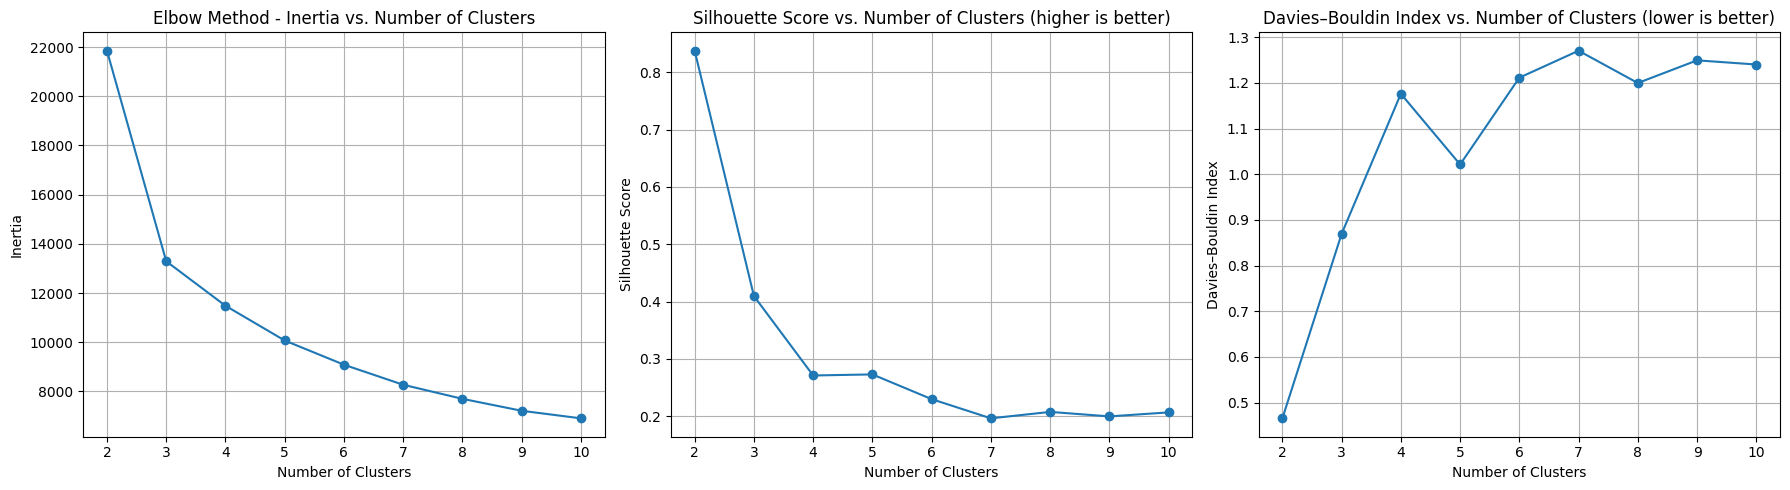

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-09-01  0.816956  0.544572  0.333039  0.823026  0.539977  0.531569   
2017-09-02  0.786442  0.490469  0.319710  0.777852  0.527467  0.519254   
2017-09-03  0.765360  0.374259  0.308761  0.762119  0.523297  0.515149   
2017-09-04  0.757346  0.352145  0.302525  0.775273  0.523122  0.514976   
2017-09-05  0.749369  0.348449  0.289814  0.779457  0.513668  0.505670   
...              ...       ...       ...       ...       ...       ...   
2017-11-26  1.345797  0.828398  0.886468  1.148795  0.678427  0.667863   
2017-11-27  1.471618  0.974793  1.154495  1.227001  0.799617  0.787165   
2017-11-28  1.944004  1.156010  1.363903  1.354304  0.817346  0.804619   
2017-11-29  1.691335  0.942464  1.022672  1.249714  0.701241  0.690322   
2017-11-30  1.483809  0.826882  0.875664  1.206172  0.678772  0.668202   

             1000102   1000315  11000011  11000016  ...   7000099   7000333  \
2017-09-01  0.589823  0.568435  

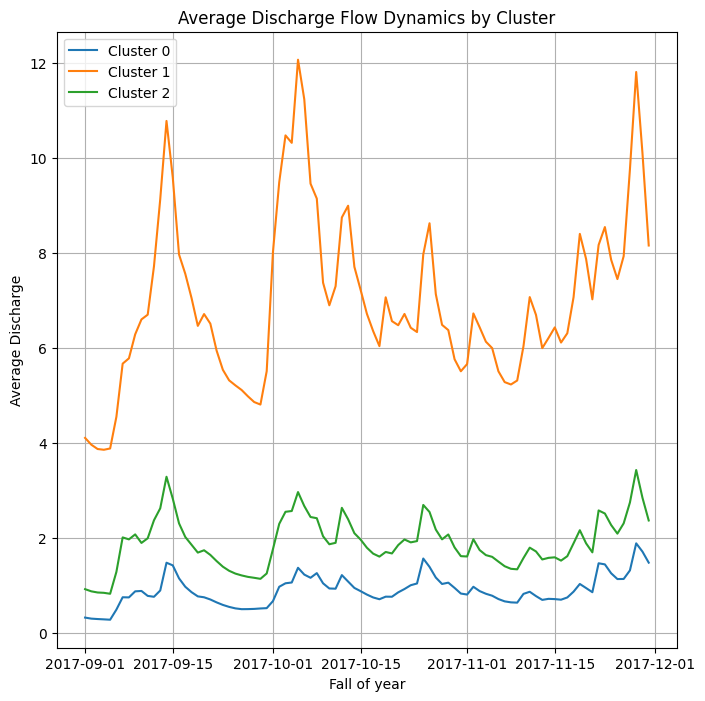

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2017-09-01  0.816956  0.544572  0.333039  0.823026  0.539977  0.531569   
2017-09-02  0.786442  0.490469  0.319710  0.777852  0.527467  0.519254   
2017-09-03  0.765360  0.374259  0.308761  0.762119  0.523297  0.515149   
2017-09-04  0.757346  0.352145  0.302525  0.775273  0.523122  0.514976   
2017-09-05  0.749369  0.348449  0.289814  0.779457  0.513668  0.505670   
...              ...       ...       ...       ...       ...       ...   
2017-11-26  1.345797  0.828398  0.886468  1.148795  0.678427  0.667863   
2017-11-27  1.471618  0.974793  1.154495  1.227001  0.799617  0.787165   
2017-11-28  1.944004  1.156010  1.363903  1.354304  0.817346  0.804619   
2017-11-29  1.691335  0.942464  1.022672  1.249714  0.701241  0.690322   
2017-11-30  1.483809  0.826882  0.875664  1.206172  0.678772  0.668202   

             1000102   1000315  11000011  11000016  ...   7000099   7000333  \
2017-09-01  0.589823  0.568435  0.419762  0.462765  ...  0.671269  0.626456   
2017-09-02  0.551925  0.531911  0.415975  0.455941  ...  0.593249  0.587880   
2017-09-03  0.529084  0.509899  0.411929  0.452376  ...  0.535417  0.560061   
2017-09-04  0.513161  0.494554  0.407021  0.451432  ...  0.535136  0.558929   
2017-09-05  0.497125  0.479099  0.402208  0.453418  ...  0.483434  0.548704   
...              ...       ...       ...       ...  ...       ...       ...   
2017-11-26  3.010992  2.901810  1.766823  2.017126  ...  1.347817  1.764803   
2017-11-27  4.282545  4.127255  1.823346  2.092198  ...  1.546065  2.108286   
2017-11-28  5.483027  5.284205  1.886324  2.194592  ...  1.951542  2.366774   
2017-11-29  3.275692  3.156911  1.915206  2.122153  ...  1.453703  1.776843   
2017-11-30  2.244444  2.163058  1.907842  1.888936  ...  1.204890  1.490379   

             8000001   9000001   9000015   9000172   9000173   9000293  \
2017-09-01  0.949084  1.056591  1.052633  0.623953  0.159263  0.471438   
2017-09-02  0.900367  1.045060  1.041817  0.603733  0.628687  0.410080   
2017-09-03  0.920487  1.027501  1.025426  0.587607  1.171652  0.359177   
2017-09-04  0.983892  1.007334  1.006621  0.576543  1.289212  0.324479   
2017-09-05  0.988105  1.004398  1.003736  0.571586  0.991434  0.306941   
...              ...       ...       ...       ...       ...       ...   
2017-11-26  2.583992  2.141359  2.043322  1.313035 -0.538352  2.143345   
2017-11-27  2.563394  2.537494  2.409086  1.593950 -0.269095  2.401260   
2017-11-28  3.070500  2.443189  2.321521  1.688440 -0.030470  2.373266   
2017-11-29  2.757625  2.370126  2.253602  1.904305  1.164080  2.149184   
2017-11-30  2.362501  1.929418  1.846035  1.860021  2.525641  1.968316   

             9000451  22000047  
2017-09-01  0.236469  0.358597  
2017-09-02  0.225257  0.357256  
2017-09-03  0.210842  0.356036  
2017-09-04  0.197674  0.355038  
2017-09-05  0.187550  0.354930  
...              ...       ...  
2017-11-26  1.301616  0.626150  
2017-11-27  1.407723  0.630094  
2017-11-28  1.546220  0.622662  
2017-11-29  1.524385  0.627366  
2017-11-30  1.351776  0.629493  

[91 rows x 388 columns]

<Axes: >

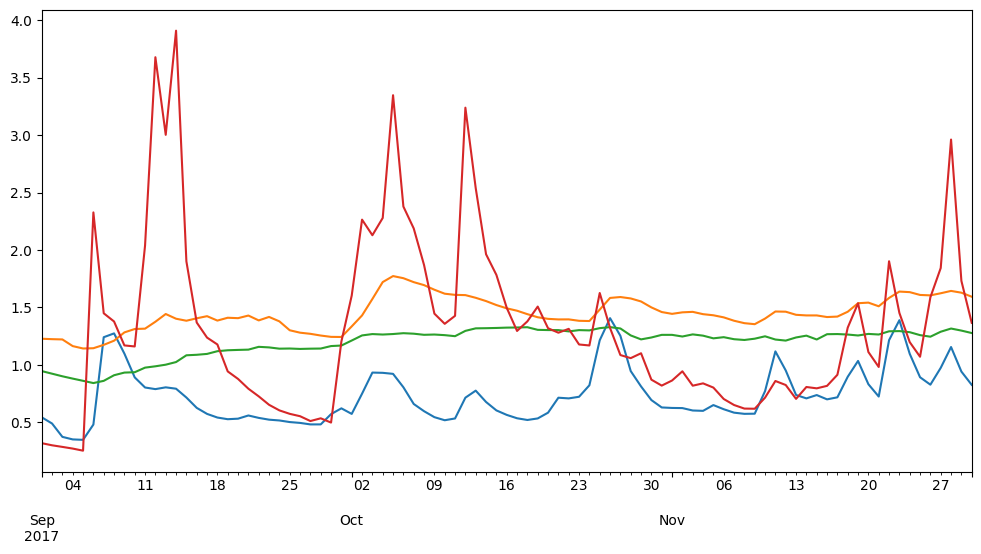

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

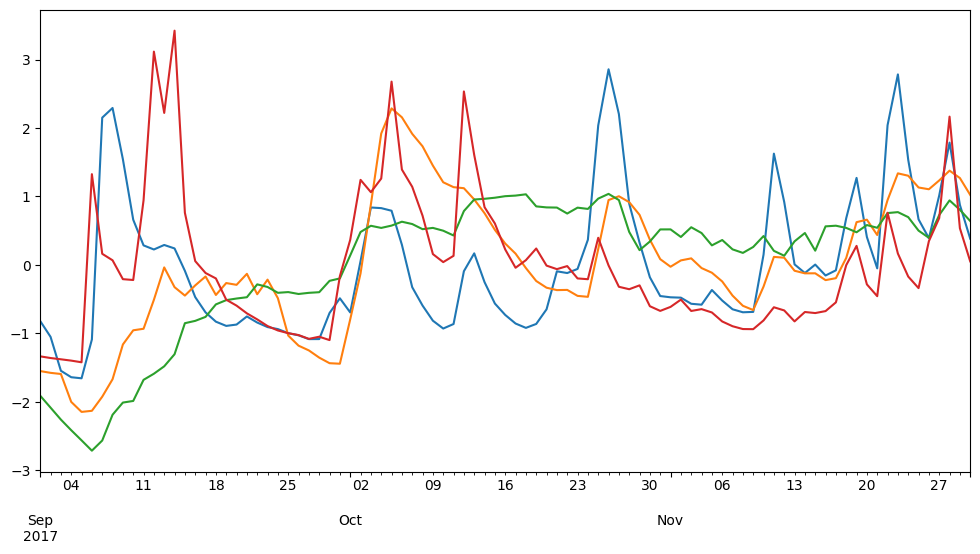

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

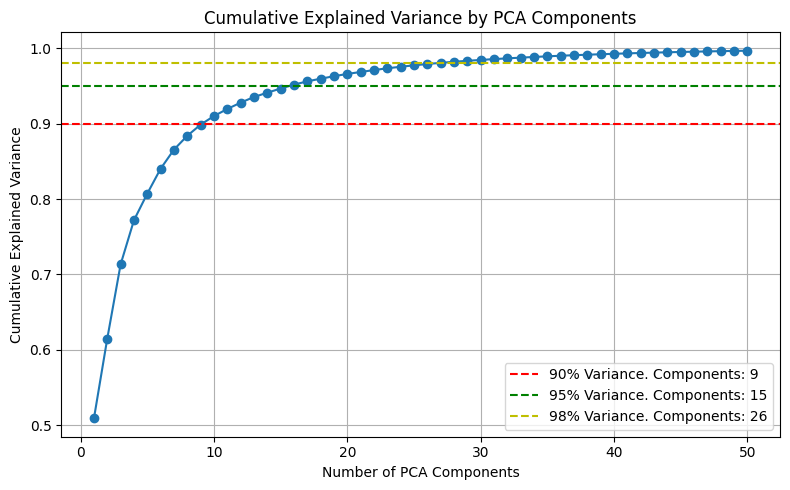

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-2.82536251e+01,  3.28971207e+00,  1.00964955e+00, ...,
         1.03624962e-01, -3.22714848e-01, -8.61051018e-01],
       [-2.94642181e+01,  2.71395096e+00,  7.23087063e-01, ...,
        -1.84083732e-02, -1.92528901e-01, -7.47766707e-01],
       [-3.01368210e+01,  2.39916526e+00,  6.21397798e-01, ...,
        -1.46839359e-01, -1.09238501e-01, -6.74426434e-01],
       ...,
       [ 4.02901905e+01, -2.17767268e+00, -3.27052368e+00, ...,
         4.11196754e-01,  8.77073177e-01,  1.66530407e-01],
       [ 3.25300582e+01, -6.68638710e+00, -6.88829173e+00, ...,
        -4.12346444e-01,  4.46328715e-01, -2.17367058e+00],
       [ 2.17771697e+01, -9.81072316e+00, -6.31974843e+00, ...,
        -6.44172843e-01, -2.60784123e-01, -1.72913556e+00]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


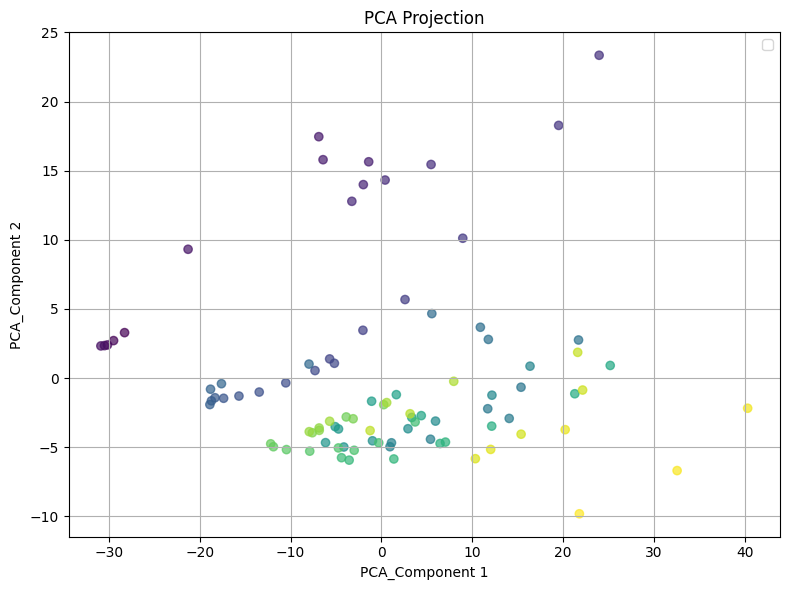

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


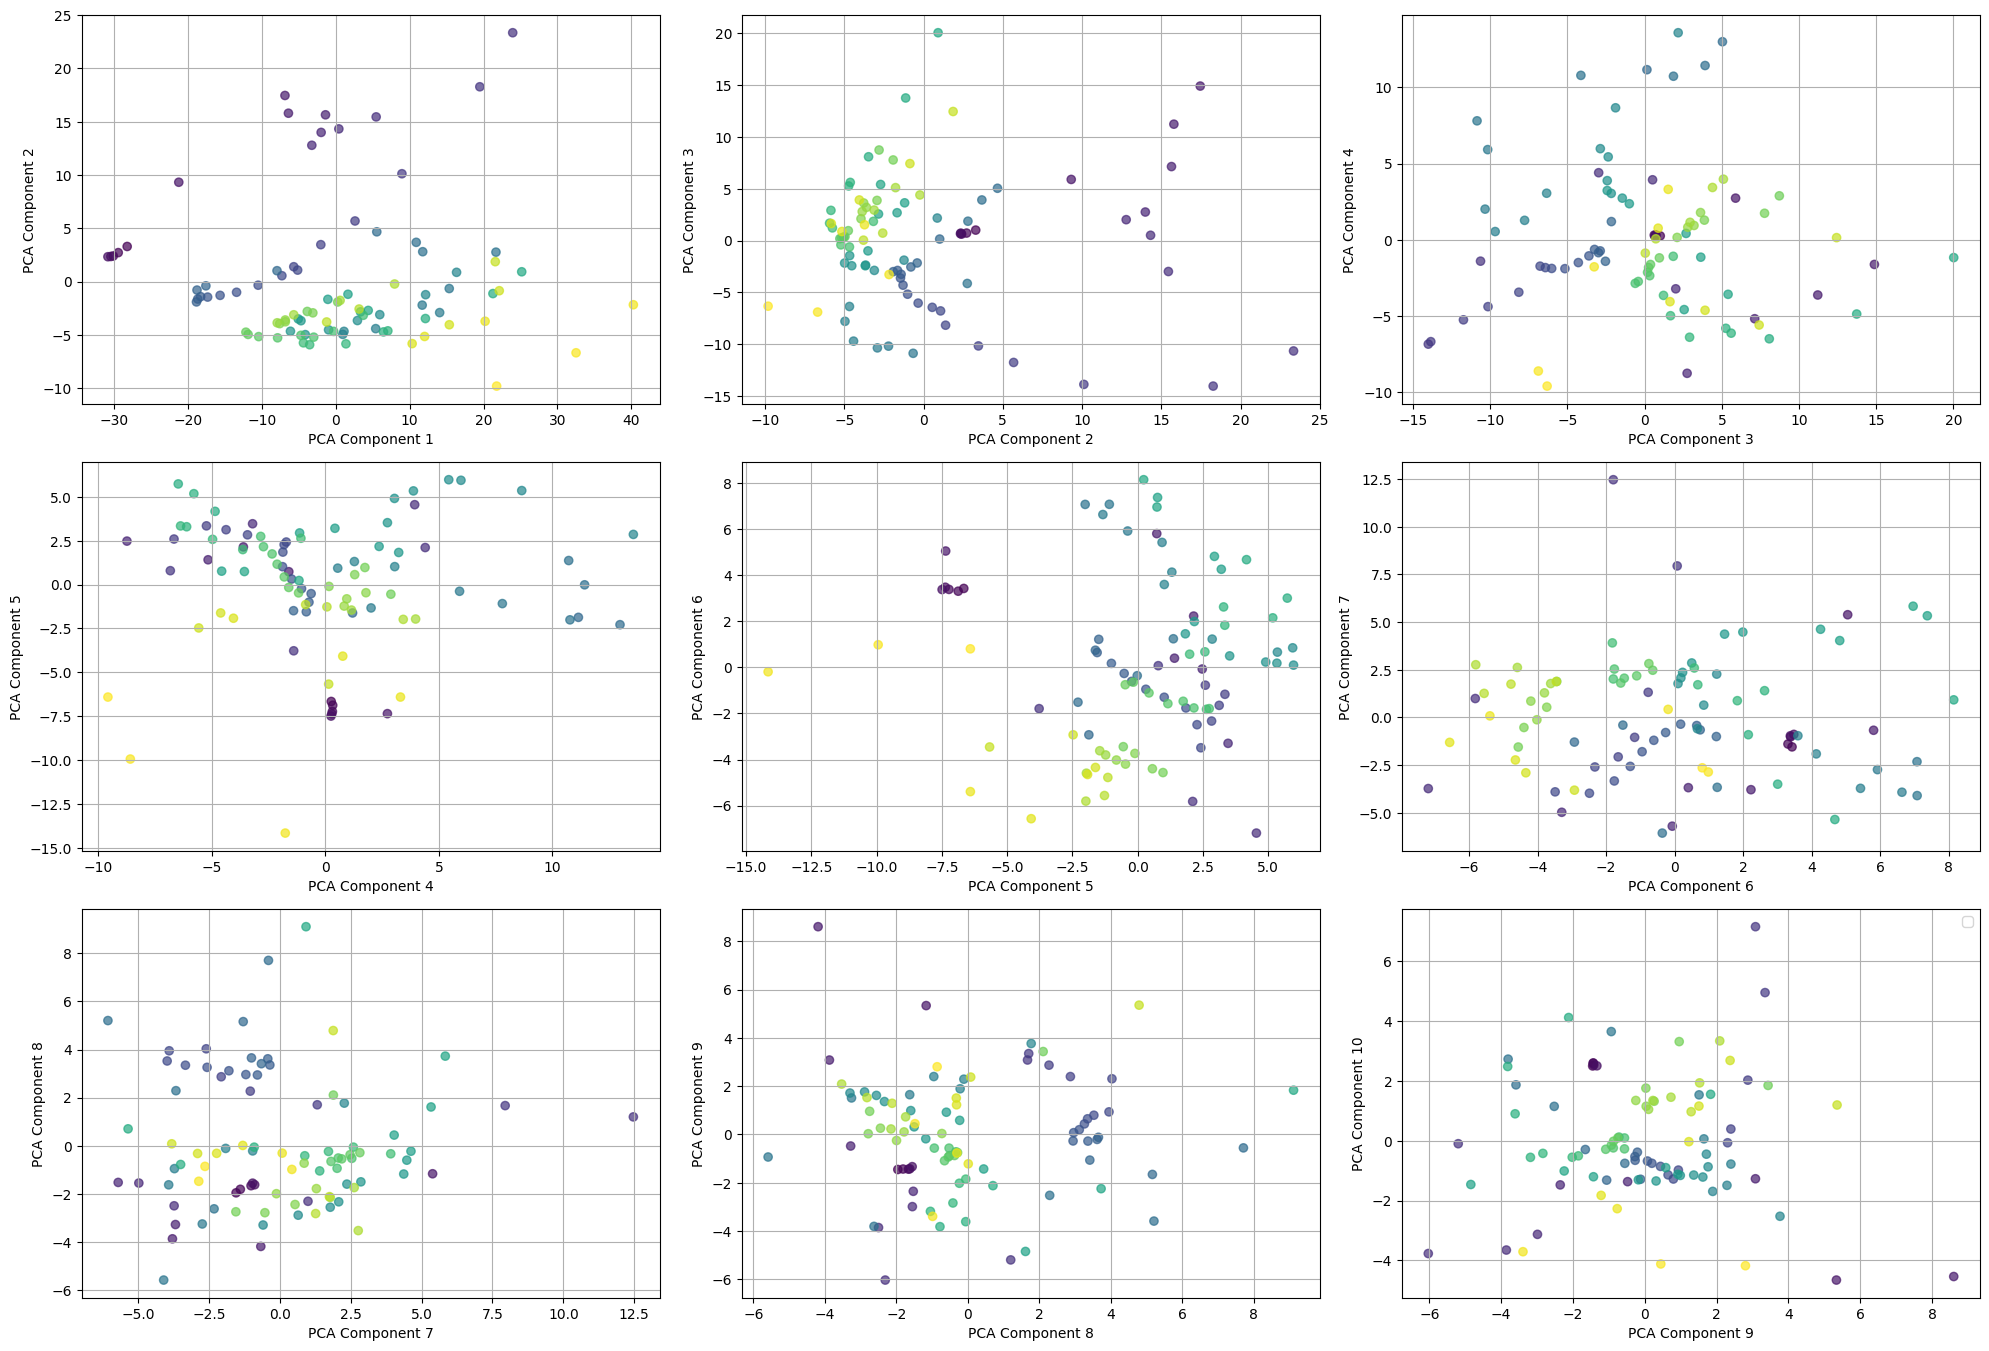

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.269
KMeans Davies-Bouldin Index is 1.477


<Axes: xlabel='k'>

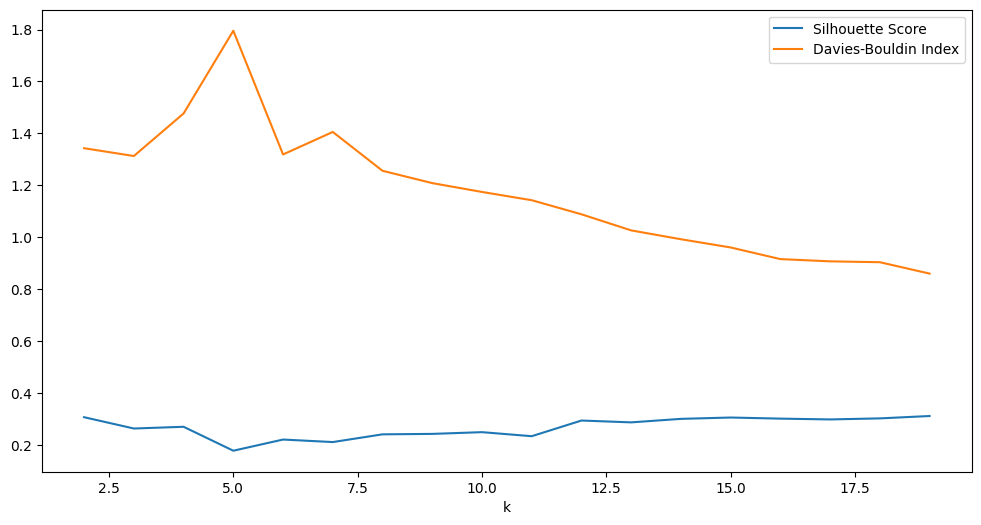

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         1     88               NaN   
2    1.01            3         1     87               NaN   
3    1.27            3         1     87               NaN   
4    1.52            3         1     86               NaN   
5    1.78            3         2     82          0.106665   
6    2.03            3         3     79         -0.027295   
7    2.29            3         3     78         -0.012859   
8    2.54            3         3     78         -0.012859   
9    2.80            3         4     72         -0.013582   
10   3.05            3         4     71         -0.006878   
11   3.31            3         4     71         -0.006878   
12   3.56            3         4     65          0.034231   
13   3.82            3         5     62          0.029404   
14   4.07            3         5     56          0.076751   
15   4.33            3         5     55          0.079844   
16   4.58            3         5     55          0.079844   
17   4.84            3         5     53          0.076406   
18   5.09            3         5     52          0.087117   
19   5.35            3         5     52          0.087117   
20   5.60            3         5     51          0.086391   
21   5.86            3         6     48          0.090446   
22   6.11            3         5     48          0.103476   
23   6.37            3         5     46          0.102372   
24   6.62            3         5     44          0.110076   
25   6.88            3         5     43          0.111505   
26   7.13            3         5     41          0.111728   
27   7.39            3         5     41          0.111728   
28   7.64            3         6     34          0.110726   
29   7.90            3         7     30          0.134182   
30   8.15            3         7     28          0.135472   
31   8.41            3         7     28          0.135472   
32   8.66            3         6     26          0.117758   
33   8.92            3         6     25          0.124715   
34   9.17            3         6     25          0.124715   
35   9.43            3         6     25          0.124715   
36   9.68            3         7     19          0.166438   
37   9.94            3         5     18          0.169807   
38  10.19            3         4     18          0.162145   
39  10.45            3         5     15          0.168172   
40  10.70            3         5     15          0.168172   
41  10.96            3         5     14          0.183178   
42  11.21            3         5     12          0.189269   
43  11.47            3         5     12          0.189269   
44  11.72            3         5     12          0.189269   
45  11.98            3         5     12          0.189269   
46  12.23            3         4     12          0.180095   
47  12.49            3         4     11          0.173080   
48  12.74            3         4     10          0.168546   
49  13.00            3         4      9          0.161971   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5               0.724930  
6               0.888232  
7               0.886403  
8               0.886403  
9               1.048051  
10              1.059570  
11              1.059570  
12              1.115934  
13              1.161870  
14              1.152726  
15              1.148966  
16              1.148966  
17              1.249288  
18              1.251944  
19              1.251944  
20              1.253148  
21              1.259690  
22              1.277766  
23              1.289998  
24              1.293654  
25              1.303130  
26              1.331063  
27              1.331063  
28              1.525015  
29              1.502593  
30              1.537019  
31              1.537019  
32 

<Axes: xlabel='eps'>

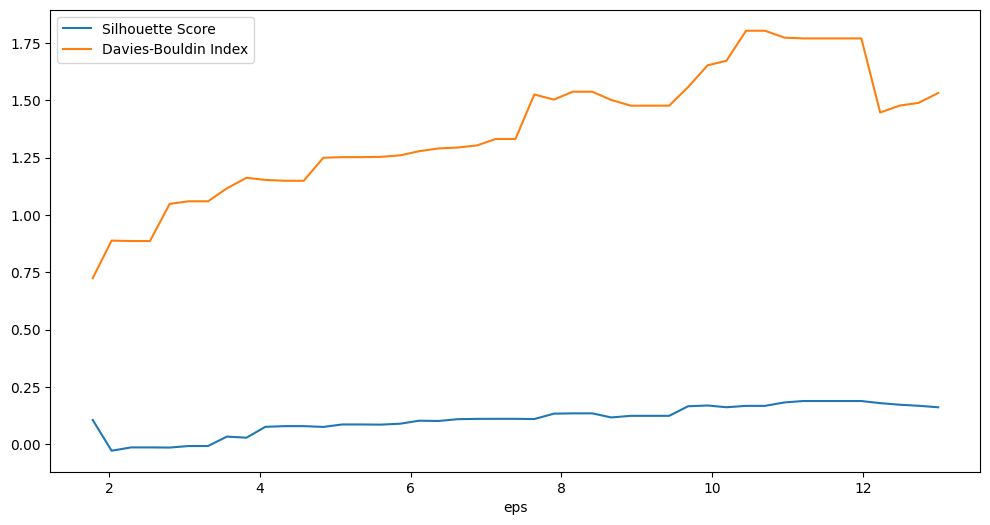

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

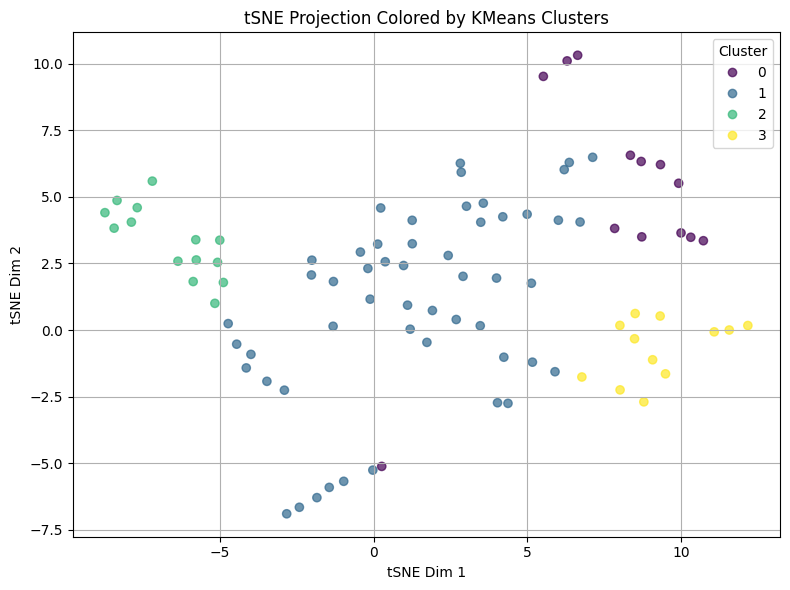

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         3    382          0.993411   
1    0.05            2         3    382          0.993411   
2    0.06            2         3    382          0.993411   
3    0.06            2         3    382          0.993411   
4    0.07            2         3    382          0.993411   
..    ...          ...       ...    ...               ...   
195  0.98            2        51    219          0.455139   
196  0.99            2        51    218          0.451014   
197  0.99            2        51    216          0.443446   
198  1.00            2        51    216          0.443446   
199  1.00            2        51    212          0.431222   

     Davies-Bouldin Index  
0                0.006859  
1                0.006859  
2                0.006859  
3                0.006859  
4                0.006859  
..                    ...  
195              0.570671  
196              0.572648  
197              0.581992  
198              0.581992  
199              0.594756  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

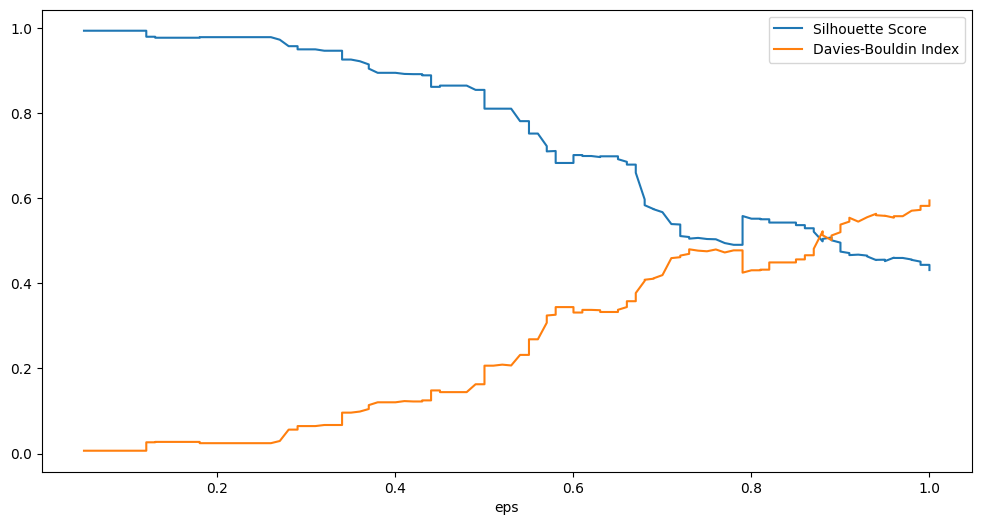

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2017
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2017-12-01 to 2018-02-28
Columns: 369 entries, 10000009 to 9000451
dtypes: float64(369)
memory usage: 260.2 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-12-01  1.310787  0.755271  0.785423  1.137518  0.640212  0.630243   
2017-12-02  1.234450  0.734396  0.751146  1.086579  0.630922  0.621098   
2017-12-03  1.400491  0.805654  0.810597  1.134972  0.685781  0.675102   
2017-12-04  1.374580  0.764451  0.758597  1.117914  0.640790  0.630812   
2017-12-05  1.284385  0.747924  0.741433  1.095409  0.641158  0.631174   
...              ...       ...       ...       ...       ...       ...   
2018-02-24  1.092962  0.963538  0.813065  1.029460  0.722518  0.964621   
2018-02-25  1.030187  0.933044  0.772901  1.008264  0.692609  0.920272   
2018-02-26  0.953901  0.905316  0.743944  0.961913  0.666175  0.881075   
2018-02-27  0.909683  0.891109  0.715784  0.941773  0.654032  0.863070   
2018-02-28  0.906719  0.921500  0.687155  1.001745  0.627529  0.823771   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-12-01  1.614802  1.556247  

          2017-12-01  2017-12-02  2017-12-03  2017-12-04  2017-12-05  \
10000009   -0.353163   -0.259067   -0.117199   -0.023881   -0.034429   
10000010   -1.071724   -1.013448   -1.000558   -0.958990   -0.900405   
10000011   -1.032723   -0.988179   -0.993218   -0.967961   -0.910883   
10000014   -0.577287   -0.482146   -0.511506   -0.417257   -0.339480   
10000016   -1.220553   -1.169548   -1.178576   -1.148517   -1.072751   
...              ...         ...         ...         ...         ...   
9000015     0.104831    0.312915    0.578184    0.701716    0.828422   
9000172    -0.353667   -0.247029   -0.161604   -0.351343   -0.336349   
9000173     2.025294    3.047619    3.987186    3.317387    4.392727   
9000293     0.264058    0.605242    0.981130    0.738043    0.829621   
9000451    -0.586495   -0.539856   -0.397342   -0.411368   -0.478186   

          2017-12-06  2017-12-07  2017-12-08  2017-12-09  2017-12-10  ...  \
10000009   -0.014904    0.007855    0.151009    0.049046  

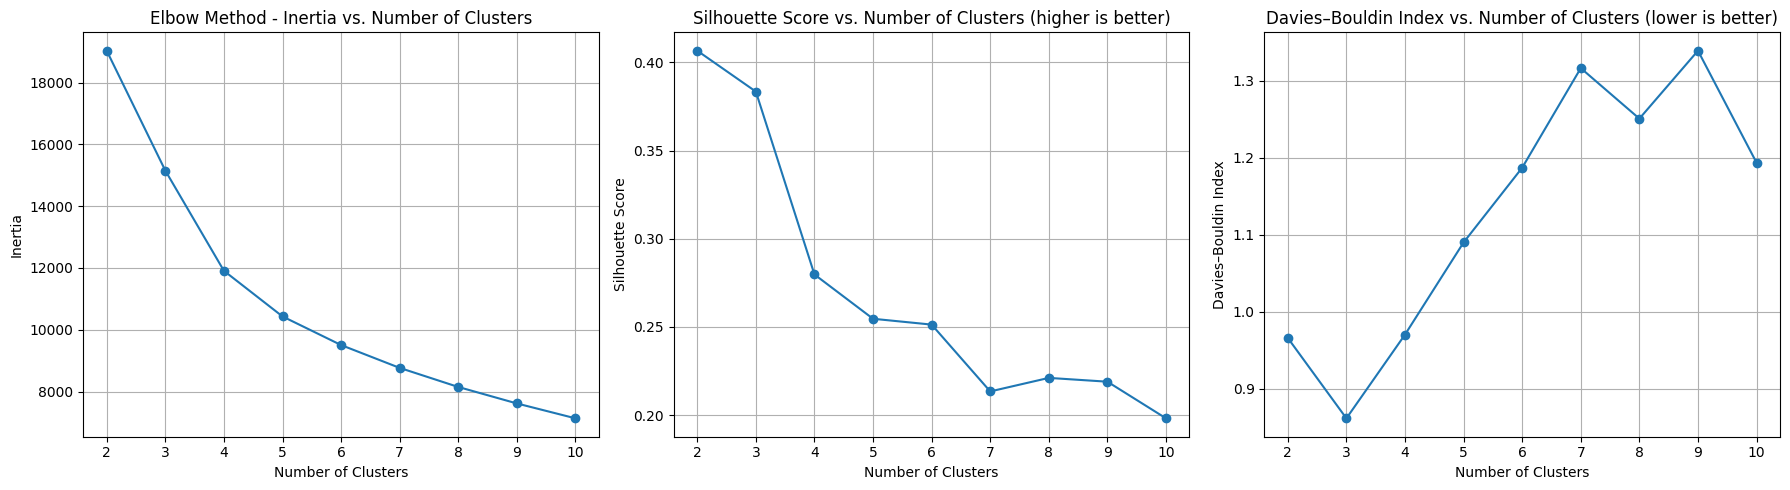

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2017-12-01  1.310787  0.755271  0.785423  1.137518  0.640212  0.630243   
2017-12-02  1.234450  0.734396  0.751146  1.086579  0.630922  0.621098   
2017-12-03  1.400491  0.805654  0.810597  1.134972  0.685781  0.675102   
2017-12-04  1.374580  0.764451  0.758597  1.117914  0.640790  0.630812   
2017-12-05  1.284385  0.747924  0.741433  1.095409  0.641158  0.631174   
...              ...       ...       ...       ...       ...       ...   
2018-02-24  1.092962  0.963538  0.813065  1.029460  0.722518  0.964621   
2018-02-25  1.030187  0.933044  0.772901  1.008264  0.692609  0.920272   
2018-02-26  0.953901  0.905316  0.743944  0.961913  0.666175  0.881075   
2018-02-27  0.909683  0.891109  0.715784  0.941773  0.654032  0.863070   
2018-02-28  0.906719  0.921500  0.687155  1.001745  0.627529  0.823771   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-12-01  1.614802  1.556247  

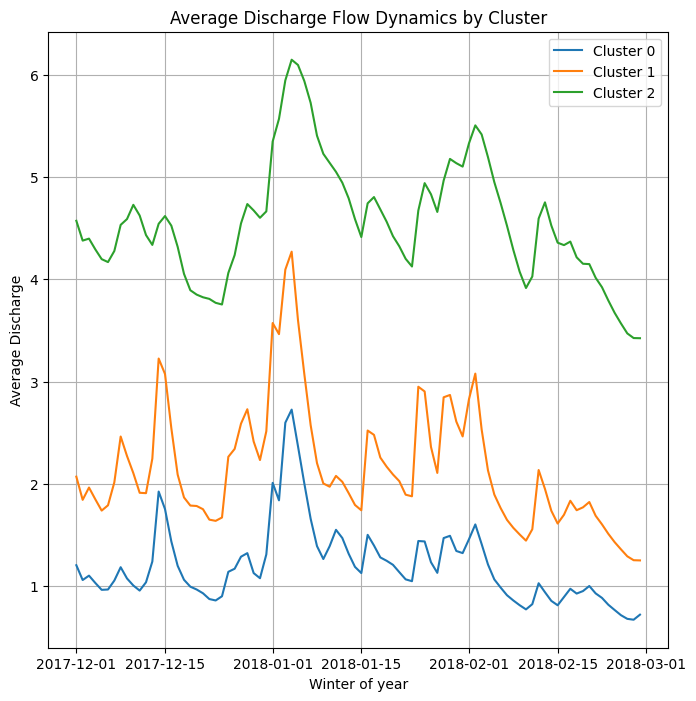

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2017-12-01  1.310787  0.755271  0.785423  1.137518  0.640212  0.630243   
2017-12-02  1.234450  0.734396  0.751146  1.086579  0.630922  0.621098   
2017-12-03  1.400491  0.805654  0.810597  1.134972  0.685781  0.675102   
2017-12-04  1.374580  0.764451  0.758597  1.117914  0.640790  0.630812   
2017-12-05  1.284385  0.747924  0.741433  1.095409  0.641158  0.631174   
...              ...       ...       ...       ...       ...       ...   
2018-02-24  1.092962  0.963538  0.813065  1.029460  0.722518  0.964621   
2018-02-25  1.030187  0.933044  0.772901  1.008264  0.692609  0.920272   
2018-02-26  0.953901  0.905316  0.743944  0.961913  0.666175  0.881075   
2018-02-27  0.909683  0.891109  0.715784  0.941773  0.654032  0.863070   
2018-02-28  0.906719  0.921500  0.687155  1.001745  0.627529  0.823771   

             1000102   1000315  11000011  11000016  ...   7000003   7000099  \
2017-12-01  1.614802  1.556247  1.879224  1.581052  ...  2.183534  1.016244   
2017-12-02  1.481392  1.427675  1.842563  1.476396  ...  1.835639  0.932779   
2017-12-03  1.701574  1.639873  1.838149  1.946756  ...  1.983310  1.109736   
2017-12-04  1.367333  1.317752  1.828409  1.655479  ...  1.830705  0.981138   
2017-12-05  1.262237  1.216466  1.792119  1.491782  ...  1.636466  0.932707   
...              ...       ...       ...       ...  ...       ...       ...   
2018-02-24  0.835487  0.805191  1.547082  1.339124  ...  1.124632  0.888262   
2018-02-25  0.754633  0.727269  1.504972  1.285266  ...  0.981552  0.757780   
2018-02-26  0.648435  0.624922  1.425447  1.226601  ...  0.829317  0.639943   
2018-02-27  0.531721  0.512440  1.424453  1.180310  ...  0.690513  0.689049   
2018-02-28  0.497298  0.479265  1.354560  1.174546  ...  0.860440  0.834229   

             7000333   8000001   9000001   9000015   9000172   9000173  \
2017-12-01  1.321187  1.968727  1.733621  1.664860  1.310398  3.149562   
2017-12-02  1.257700  1.779948  1.678502  1.613598  1.242430  3.426343   
2017-12-03  1.395442  1.911660  1.955324  1.868747  1.370589  4.164299   
2017-12-04  1.200584  1.784082  1.933313  1.848009  1.160921  3.554653   
2017-12-05  1.163282  1.646310  1.902244  1.818909  1.097349  4.026947   
...              ...       ...       ...       ...       ...       ...   
2018-02-24  0.968763  1.474016  2.418448  2.289104  1.071693  3.200925   
2018-02-25  0.886400  1.349194  2.359671  2.234930  0.998885  3.348065   
2018-02-26  0.794094  1.205818  2.302789  2.182501  0.922175  2.812169   
2018-02-27  0.699218  1.059434  2.261841  2.144807  0.860192  2.903797   
2018-02-28  0.844213  1.111546  2.219576  2.105885  0.845190  2.416172   

             9000293   9000451  
2017-12-01  1.787959  1.130400  
2017-12-02  1.807372  1.048325  
2017-12-03  2.140083  1.211848  
2017-12-04  1.871711  1.121757  
2017-12-05  1.819652  1.009483  
...              ...       ...  
2018-02-24  1.054627  0.858073  
2018-02-25  0.979310  0.797927  
2018-02-26  0.910264  0.748814  
2018-02-27  0.853044  0.713121  
2018-02-28  0.798799  0.686179  

[90 rows x 369 columns]

<Axes: >

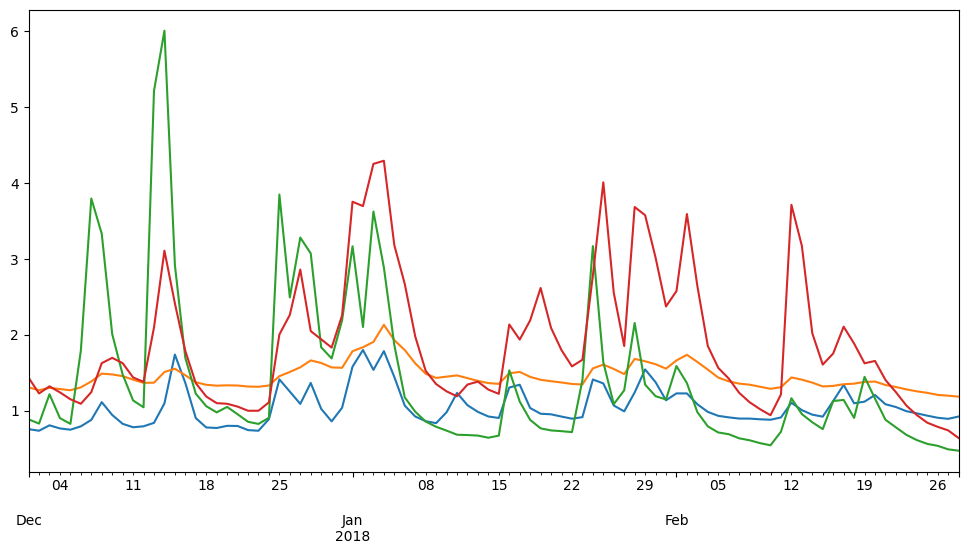

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

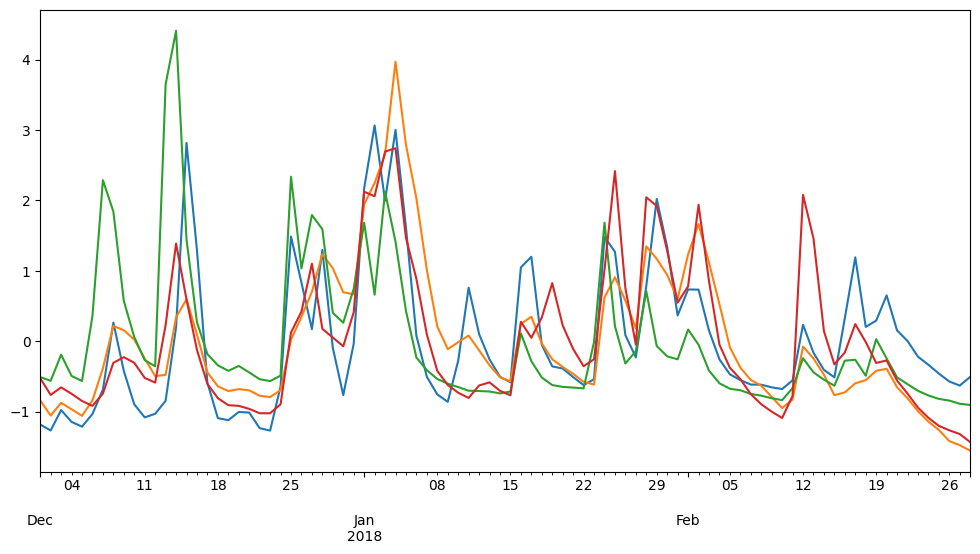

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

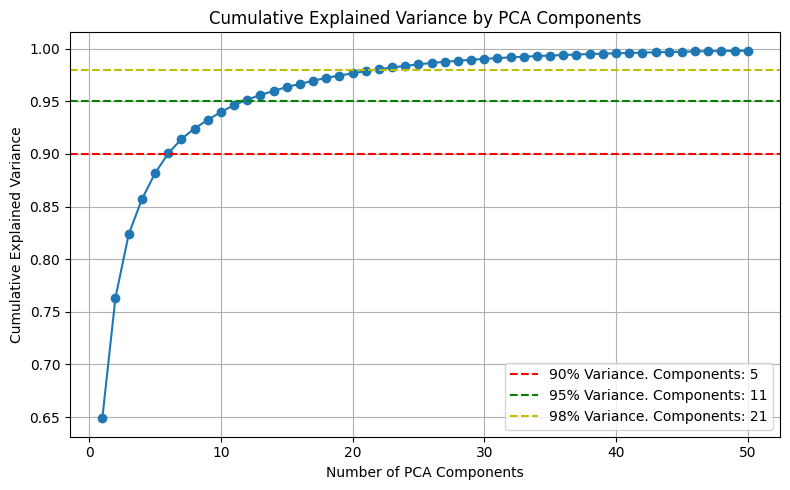

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-2.49665165e+00,  8.96178553e+00, -6.28134328e+00, ...,
         1.41058547e-02,  2.47969127e-02, -1.43080061e+00],
       [-8.10808185e+00,  6.84953976e+00, -5.53705750e+00, ...,
         6.16729454e-01, -4.83589840e-02, -8.62433054e-01],
       [-5.73716915e+00,  3.79550519e+00, -5.95441138e+00, ...,
         5.55848035e-01,  2.06265773e-01,  1.47841110e-02],
       ...,
       [-2.27187358e+01, -4.14237058e+00,  1.20342315e+00, ...,
        -4.59549046e-01, -3.43432593e-01, -1.33557730e+00],
       [-2.36479534e+01, -4.26399115e+00,  7.03482386e-01, ...,
        -9.76357018e-01,  5.08224478e-01, -1.30950401e+00],
       [-2.25496896e+01, -5.11224547e+00, -1.20593740e-01, ...,
         9.41920498e-02,  2.03083376e+00,  9.42592883e-01]],
      shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


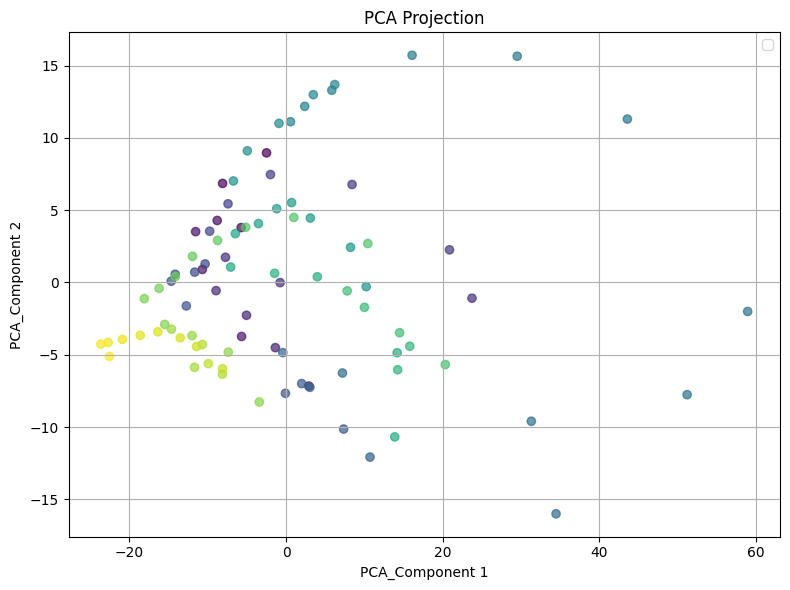

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_2340\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


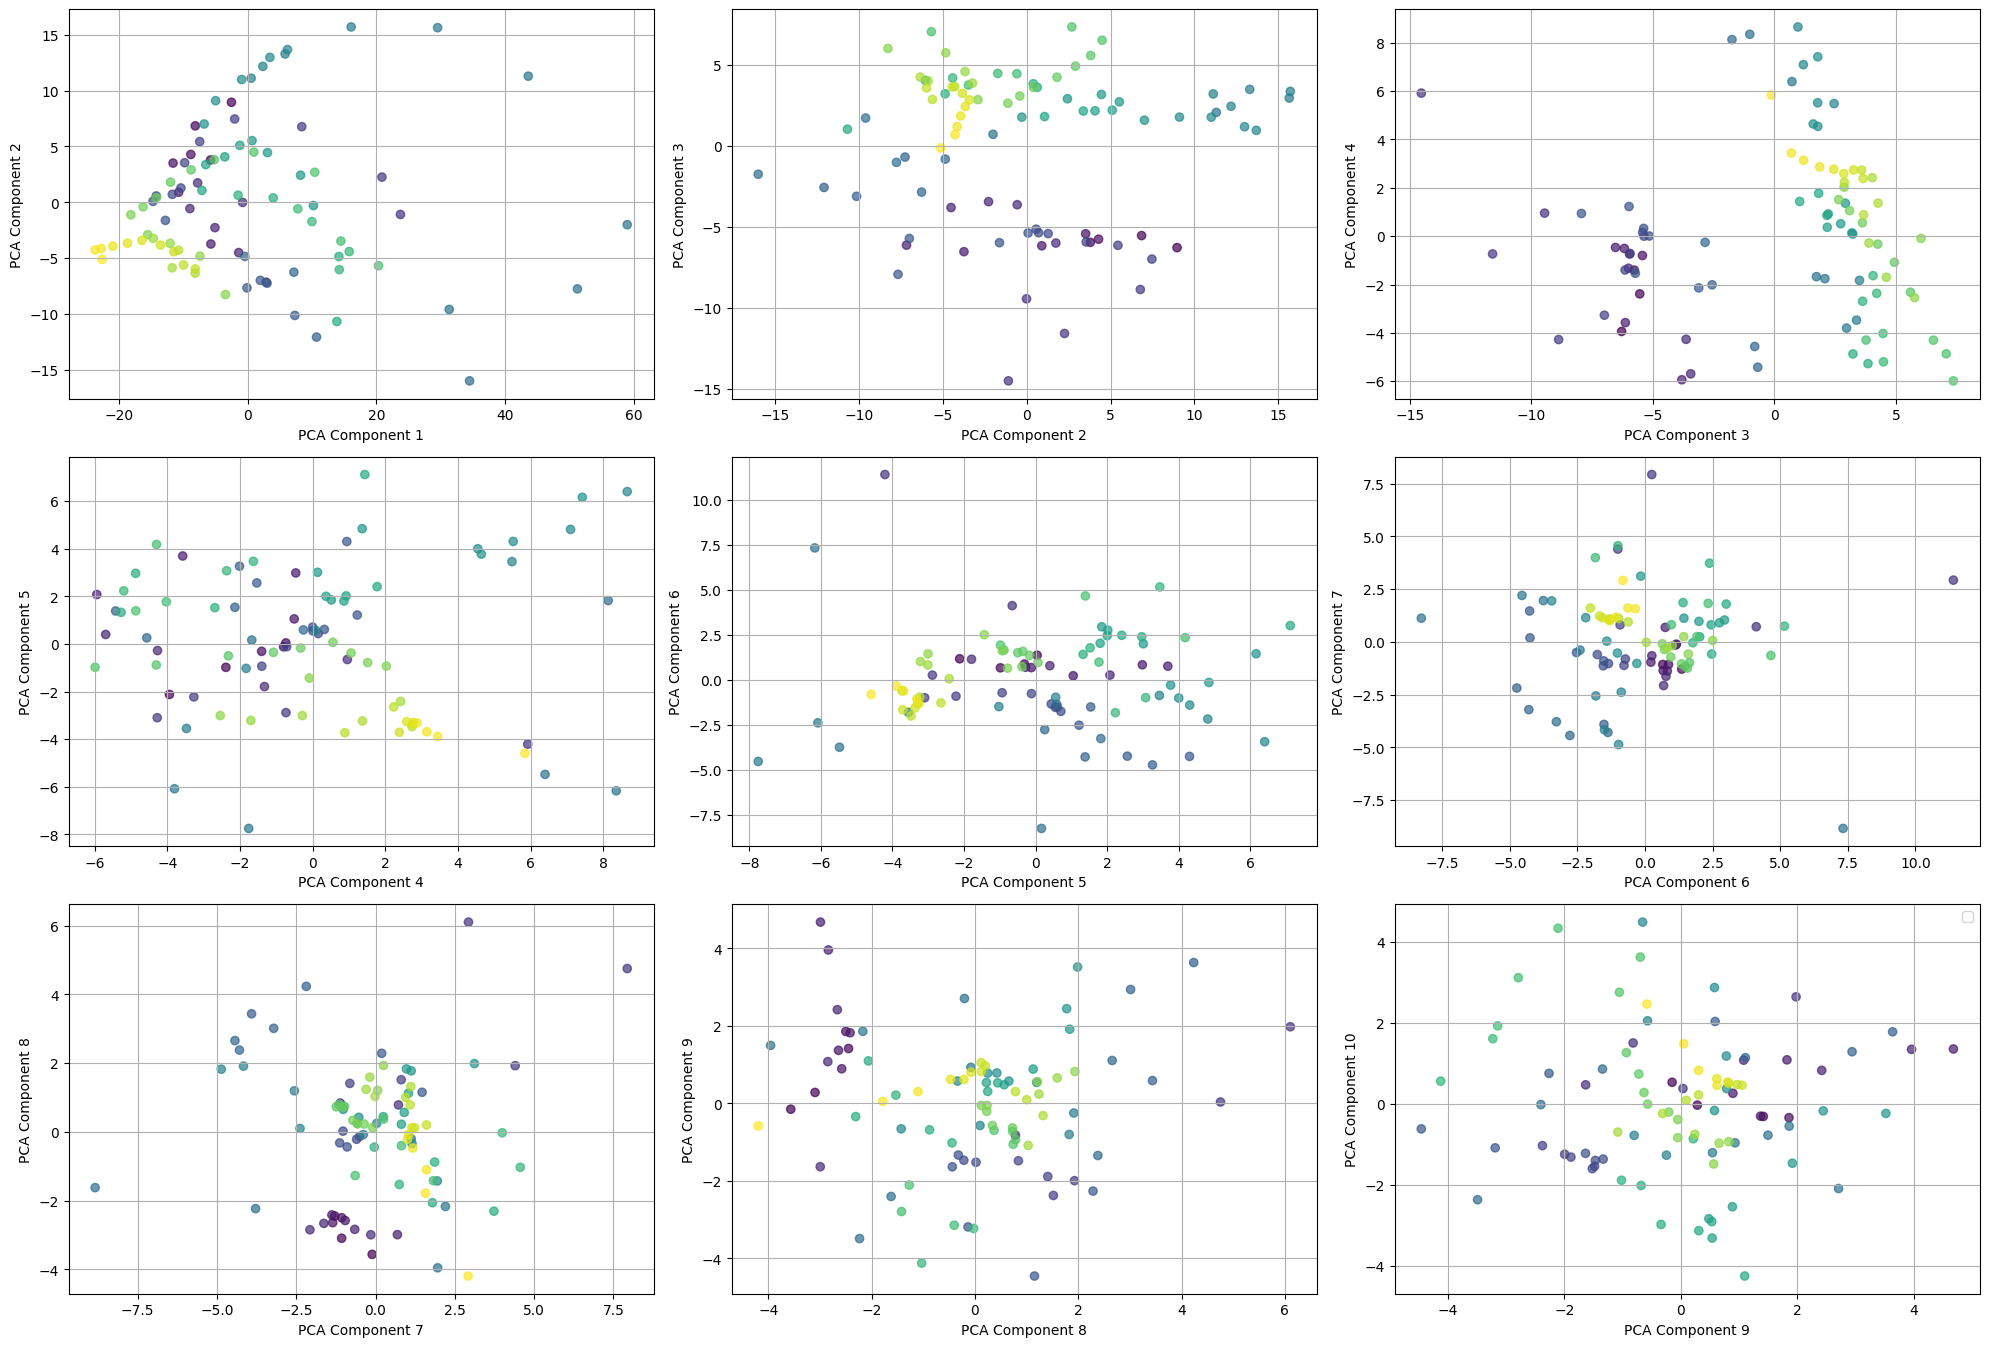

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.274
KMeans Davies-Bouldin Index is 1.274


<Axes: xlabel='k'>

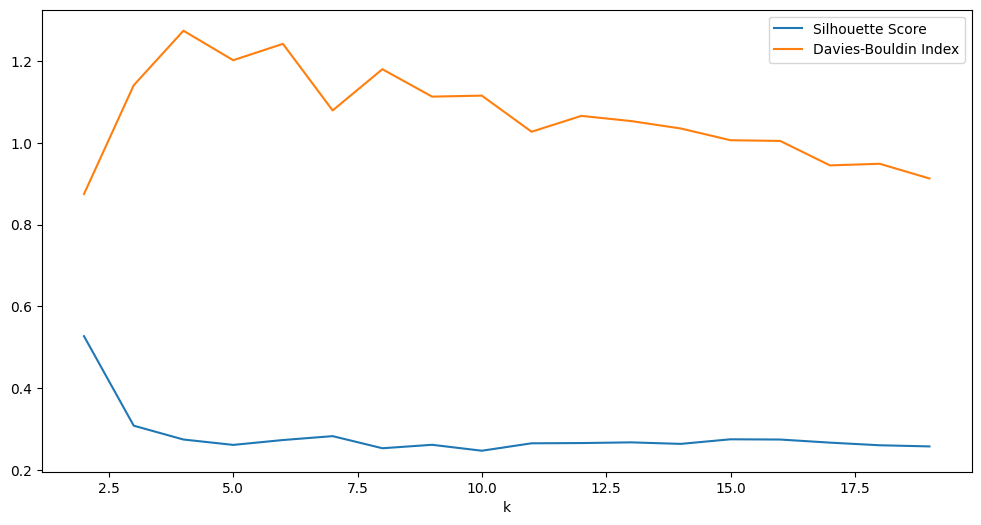

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         0     90               NaN   
3    1.27            3         0     90               NaN   
4    1.52            3         0     90               NaN   
5    1.78            3         0     90               NaN   
6    2.03            3         0     90               NaN   
7    2.29            3         0     90               NaN   
8    2.54            3         1     87               NaN   
9    2.80            3         3     78         -0.084841   
10   3.05            3         4     74         -0.192640   
11   3.31            3         4     69         -0.135236   
12   3.56            3         5     61         -0.087005   
13   3.82            3         5     58         -0.069147   
14   4.07            3         5     55         -0.029836   
15   4.33            3         5     53         -0.018021   
16   4.58            3         4     51          0.018851   
17   4.84            3         5     48          0.036406   
18   5.09            3         5     48          0.036406   
19   5.35            3         5     48          0.036406   
20   5.60            3         4     47          0.065925   
21   5.86            3         5     44          0.074557   
22   6.11            3         5     42          0.089892   
23   6.37            3         5     41          0.100561   
24   6.62            3         5     41          0.100561   
25   6.88            3         5     38          0.107759   
26   7.13            3         3     35          0.058199   
27   7.39            3         3     34          0.061106   
28   7.64            3         3     32          0.065490   
29   7.90            3         3     29          0.038031   
30   8.15            3         3     24          0.020789   
31   8.41            3         3     23          0.031359   
32   8.66            3         3     21          0.034090   
33   8.92            3         3     19          0.022744   
34   9.17            3         3     17          0.027435   
35   9.43            3         3     15          0.051692   
36   9.68            3         3     14          0.047141   
37   9.94            3         2     12          0.141432   
38  10.19            3         1     12               NaN   
39  10.45            3         1     12               NaN   
40  10.70            3         1     11               NaN   
41  10.96            3         1     11               NaN   
42  11.21            3         1     11               NaN   
43  11.47            3         1      9               NaN   
44  11.72            3         1      8               NaN   
45  11.98            3         1      8               NaN   
46  12.23            3         1      8               NaN   
47  12.49            3         1      8               NaN   
48  12.74            3         1      8               NaN   
49  13.00            3         1      8               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6                    NaN  
7                    NaN  
8                    NaN  
9               0.997942  
10              1.456001  
11              1.444600  
12              1.407332  
13              1.469378  
14              1.421204  
15              1.403537  
16              1.312783  
17              1.235086  
18              1.235086  
19              1.235086  
20              1.275950  
21              1.229229  
22              1.238357  
23              1.223062  
24              1.223062  
25              1.202283  
26              1.497163  
27              1.487892  
28              1.515167  
29              1.595843  
30              2.005328  
31              1.967601  
32 

<Axes: xlabel='eps'>

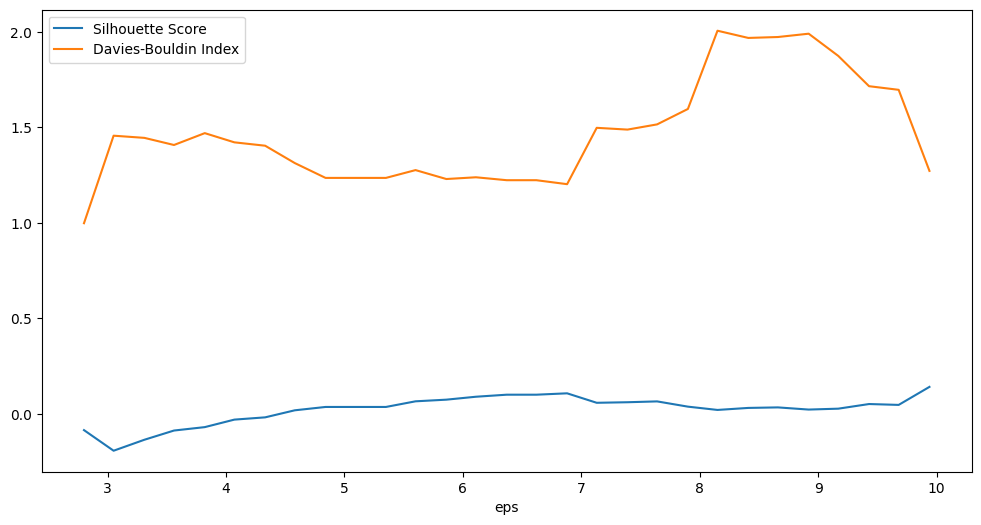

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

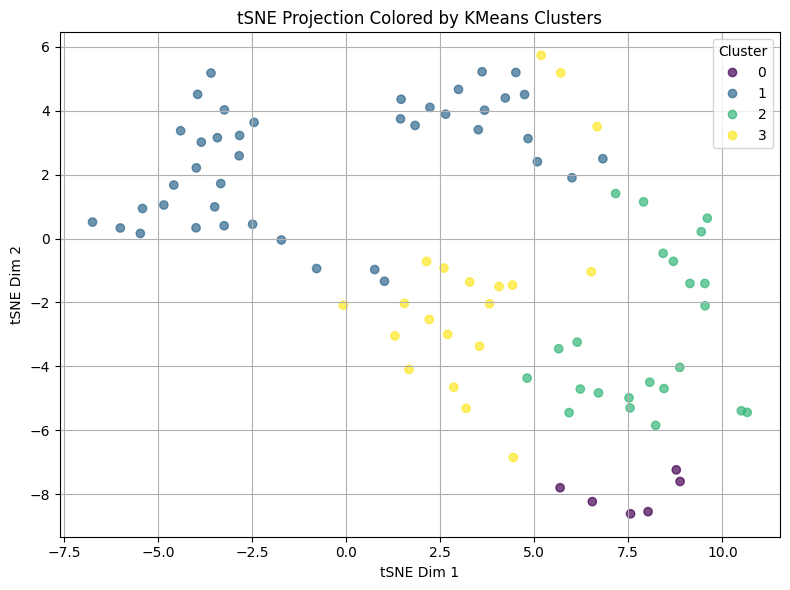

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         3    363          0.992412   
1    0.05            2         3    363          0.992412   
2    0.06            2         3    363          0.992412   
3    0.06            2         3    363          0.992412   
4    0.07            2         3    363          0.992412   
..    ...          ...       ...    ...               ...   
195  0.98            2        39    273          0.543802   
196  0.99            2        39    273          0.543802   
197  0.99            2        39    273          0.543802   
198  1.00            2        39    272          0.536709   
199  1.00            2        40    270          0.541573   

     Davies-Bouldin Index  
0                0.008409  
1                0.008409  
2                0.008409  
3                0.008409  
4                0.008409  
..                    ...  
195              0.518433  
196              0.518433  
197              0.518433  
198              0.525213  
199              0.519029  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

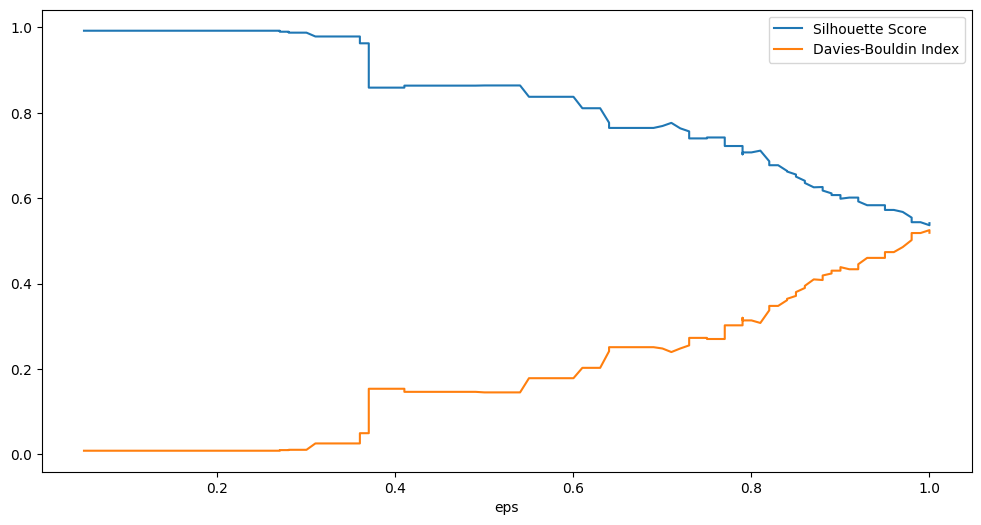

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))